# 1. Preparation of Data and Metadata

## 1.1 Feature Index Mapping

This task involves parsing a CSV file named "idx_to_feature_name.csv" to pair feature names with their corresponding index ranges within a numpy array. \
\
The output format of `indices_dict` is **{"feature_name": (idx_start, idx_stop), ...}** \
\
Providing a clear association between features and their positions in the array. This facilitates efficient data manipulation and analysis by enabling precise referencing and extraction of specific features from the array.

In [31]:
# import dependencies
import csv

In [32]:
IDX_TO_FEATURE_NAME_FILE = "Files\metadata\idx_to_feature_name.csv"

In [143]:
def create_indices_dict(csv_file):
    indices_dict = {}
    with open(csv_file, newline='') as csvfile:
        csv_reader = csv.reader(csvfile)
        next(csv_reader)  # Skip header
        for row in csv_reader:
            index = int(row[0])
            feature_name_parts = row[1].split('_')
            feature_name = '_'.join(feature_name_parts[:-1]).lower()  # Extract feature name without the number suffix and convert to lowercase
            if feature_name not in indices_dict:
                indices_dict[feature_name] = (index, index)
            else:
                start_idx, _ = indices_dict[feature_name]
                indices_dict[feature_name] = (start_idx, index)
    return indices_dict

indices_dict = create_indices_dict(IDX_TO_FEATURE_NAME_FILE)
print(f"The variable looks like:\n{indices_dict}")

The variable looks like:
{'bandwidth': (0, 0), 'centroid': (1, 1), 'contrast': (2, 8), 'energy': (9, 9), 'flatness': (10, 10), 'flux': (11, 11), 'melspect': (12, 75), 'mfcc': (76, 107), 'mfcc_d': (108, 139), 'mfcc_d2': (140, 171), 'power': (172, 172), 'yin': (173, 173), 'zcr': (174, 174)}


In [152]:
def get_feature_indices(feature_name, indices_dict):
    lower_feature_name = feature_name.lower()
    for key in indices_dict.keys():
        if lower_feature_name == key.lower():
            return indices_dict[key], ""
    return (), f"Error: {feature_name} not found in the indices dictionary."

# Example usage:
feature_name = "contrast"

indices, error_message = get_feature_indices(feature_name, indices_dict)
if indices:
    print(f"The indices for \"{feature_name}\" are: {indices}. \
          \nThis means, in the audio dataset (numpy array) \"contrast\" has {indices[1] - indices[0] + 1} feature rows.")
else:
    print(error_message)

The indices for "contrast" are: (2, 8).           
This means, in the audio dataset (numpy array) "contrast" has 7 feature rows.


In [145]:
def print_feature_names(dictionary):
    print("The feature names are:")
    print("")
    for key, value in dictionary.items():
        print(f"{key}")

print_feature_names(indices_dict)

The feature names are:

bandwidth
centroid
contrast
energy
flatness
flux
melspect
mfcc
mfcc_d
mfcc_d2
power
yin
zcr


## 1.2 Class-wise Sample ID Dictionary Creation

Given the input file "development.csv" containing class labels as strings and sample IDs, the task aims to produce a dictionary where each class label corresponds to a list of sample IDs belonging to that class. For instance, "Alarm" would map to a list of sample IDs such as [1, 6, 8, 9, ...]. This output format organizes the data for easy reference and analysis based on class membership.

In [153]:
import csv

In [154]:
DEVELOPMENT_FILE = "Files\metadata\development.csv"

In [170]:
def replace_special_characters(word):
    # Replace special characters with ASCII equivalents
    word = word.replace('ö', 'oe').replace('ä', 'ae').replace('ü', 'ue').replace('ß', 'ss')
    return word

def create_word_id_dictionary(csv_file):
    word_id_dict = {}
    with open(csv_file, newline='', encoding='utf-8') as csvfile:  # Specify UTF-8 encoding
        csv_reader = csv.DictReader(csvfile)
        for row in csv_reader:
            word = replace_special_characters(row['word'])
            word_id_dict.setdefault(word, []).append(int(row['id']))
    return word_id_dict

# Example usage:
word_id_dict = create_word_id_dictionary(DEVELOPMENT_FILE)

# Print the dictionary
for word, ids in word_id_dict.items():
    print(f"{word}: [{str(ids[:5])[1:-1] + ', ...'}]")

Broetchen: [0, 13, 18, 67, 80, ...]
kann: [1, 15, 27, 48, 81, ...]
Staubsauger: [2, 16, 54, 58, 82, ...]
Spiegel: [3, 12, 17, 63, 83, ...]
Alarm: [4, 45, 62, 64, 84, ...]
Lueftung: [5, 19, 33, 37, 85, ...]
Ofen: [6, 10, 42, 49, 86, ...]
Haus: [7, 21, 25, 36, 87, ...]
Heizung: [8, 30, 57, 65, 88, ...]
Fernseher: [9, 47, 53, 61, 89, ...]
Schraube: [11, 24, 26, 60, 91, ...]
Licht: [14, 41, 52, 78, 94, ...]
aus: [20, 31, 44, 66, 100, ...]
nicht: [22, 29, 70, 75, 102, ...]
warm: [23, 28, 39, 55, 103, ...]
an: [32, 73, 76, 79, 112, ...]
Leitung: [34, 43, 69, 72, 114, ...]
offen: [35, 38, 46, 77, 115, ...]
wunderbar: [40, 50, 68, 74, 120, ...]
Radio: [51, 56, 59, 71, 131, ...]
other: [40834, 40835, 40836, 40837, 40838, ...]


In [171]:
def search_class(word, word_id_dict):
    word = replace_special_characters(word)
    for key in word_id_dict.keys():
        if word == key:
            return word_id_dict[word], ""
    return [], f"Error: \"{word}\" not found in the indices dictionary."

# Example usage:
search_word = "Broetchen"
word_list, error_message = search_class(search_word, word_id_dict)
if word_list:
    max_elements = 5
    display_list = word_list[:max_elements] + ['...'] if len(word_list) > max_elements else word_list
    print(f"The 5 first ids in the list for \"{search_word}\" are: {display_list}")
else:
    print(error_message)

The 5 first ids in the list for "Broetchen" are: [0, 13, 18, 67, 80, '...']


In [173]:
def print_class_lengths(dictionary):
    print("The size of the different samples of each class is:")
    print("")
    for class_label, sample_ids in dictionary.items():
        print(f"{class_label}: {len(sample_ids)}")

print_class_lengths(word_id_dict)

The size of the different samples of each class is:

Broetchen: 2038
kann: 2038
Staubsauger: 2038
Spiegel: 2040
Alarm: 2042
Lueftung: 2045
Ofen: 2044
Haus: 2042
Heizung: 2036
Fernseher: 2046
Schraube: 2046
Licht: 2044
aus: 2041
nicht: 2045
warm: 2040
an: 2041
Leitung: 2045
offen: 2039
wunderbar: 2042
Radio: 2042
other: 4462


## 1.3 Load WAV Files
This task involves traversing a directory structure with multiple classes, each containing corresponding filenames. The output is a dictionary where each class label maps to a list of filepaths belonging to that class. This organized structure facilitates easy retrieval and manipulation of files based on their class membership.

In [42]:
import os
from glob import glob

In [43]:
WAV_DIR = "Files/MLPC24_speech_commands_raw_waveforms"

In [174]:
def count_files_in_directory(directory):
    file_list = glob(f"{directory}/**", recursive=True)
    file_count = sum(1 for f in file_list if not os.path.isdir(f))
    return file_count

# Example usage:
total_files = count_files_in_directory(WAV_DIR)
print(f"Total number of files in directory '{WAV_DIR}': {total_files}")
print("")
annotated_classes_dict = load_audio_files(WAV_DIR)
for annotated_class, files in annotated_classes_dict.items():
    print(f"{annotated_class}: {len(files)} files")

Total number of files in directory 'Files/MLPC24_speech_commands_raw_waveforms': 45296

Alarm: 2042 files
an: 2041 files
aus: 2041 files
Brötchen: 2038 files
Fernseher: 2046 files
Haus: 2042 files
Heizung: 2036 files
kann: 2038 files
Leitung: 2045 files
Licht: 2044 files
Lüftung: 2045 files
nicht: 2045 files
Ofen: 2044 files
offen: 2039 files
other: 4462 files
Radio: 2042 files
Schraube: 2046 files
Spiegel: 2040 files
Staubsauger: 2038 files
warm: 2040 files
wunderbar: 2042 files


In [176]:
def load_audio_files(directory):
    audio_files = glob(os.path.join(directory, "*", "*.wav"))
    annotated_classes_dict = {}
    for file in audio_files:
        annotated_class = os.path.basename(os.path.dirname(file))
        annotated_classes_dict.setdefault(annotated_class, []).append(file)
    return annotated_classes_dict

def print_list_in_rows(lst, items_per_row):
    print("[")
    for i in range(0, len(lst), items_per_row):
        row = lst[i:i+items_per_row]
        print("" + ", ".join(row), end=",\n" if i + items_per_row < len(lst) else "\n")
    print("]")
        
# Example usage:
search_word = "Alarm"
max_elements = 5
display_list = annotated_classes_dict[search_word][:max_elements] + ['...'] if len(annotated_classes_dict[search_word]) > max_elements else annotated_classes_dict[search_word]
print("")
print(f"The 5 first ids in the list for dict key \"{search_word}\" are:")
print_list_in_rows(display_list, items_per_row=1)


The 5 first ids in the list for dict key "Alarm" are:
[
Files/MLPC24_speech_commands_raw_waveforms\Alarm\1.wav,
Files/MLPC24_speech_commands_raw_waveforms\Alarm\10.wav,
Files/MLPC24_speech_commands_raw_waveforms\Alarm\100.wav,
Files/MLPC24_speech_commands_raw_waveforms\Alarm\1000.wav,
Files/MLPC24_speech_commands_raw_waveforms\Alarm\1001.wav,
...
]


In [177]:
def word_exists_in_dict(word, dictionary):
    return word in dictionary

def construct_wav_file_path(class_dir, class_label, id_wav_file):
    return os.path.join(class_dir, class_label, f"{id_wav_file}.wav")

# Example usage:
word = "Alarm"
file_id = 1
if word_exists_in_dict(word, word_id_dict):
    wav_filepath = construct_wav_file_path(WAV_DIR, word, file_id)
    print(f"The filepath is: {wav_filepath}")
else:
    print(f"\"{word}\" doesnt exist in class labels!")

The filepath is: Files/MLPC24_speech_commands_raw_waveforms\Alarm\1.wav


In [178]:
def extract_class_and_id(filepath):
    # Split the filepath into directory and filename using os.path.split()
    directory, filename = os.path.split(filepath)
    
    # Get the class label and ID from the filename
    class_label = os.path.basename(directory)
    id_, _ = os.path.splitext(filename)  # Extract ID without the extension
    
    return (class_label, id_)

# Example usage:
filepath = "Files/MLPC24_speech_commands_raw_waveforms/Alarm/1.wav"
class_label, id_ = extract_class_and_id(filepath)
print(f"Class label: ({class_label}, {id_})")


Class label: (Alarm, 1)


### 1.3.2 Numpy dataset

This task entails associating numpy data with their respective class names or IDs. It involves linking each data sample in the numpy array with its corresponding class label or identifier. By creating this association, the dataset becomes organized, allowing for easy access and analysis of data samples based on their class membership.

In [49]:
import numpy as np

In [181]:
DATASET_DIR = "Files/development_numpy/development.npy"

In [182]:
dataset_audio = np.load(DATASET_DIR)

# Output the size information
print(f"The dataset contains {dataset_audio.shape[0]} different samples, each divided into {dataset_audio.shape[1]} features and {dataset_audio.shape[2]} timestamps.")
print("\nThis means:")
print(f"- Samples: {dataset_audio.shape[0]}")
print(f"- Features per sample: {dataset_audio.shape[1]}")
print(f"- Timeframes per sample: {dataset_audio.shape[2]}")
print(f"\nShape of the dataset: {dataset_audio.shape}")

The dataset contains 45296 different samples, each divided into 175 features and 44 timestamps.

This means:
- Samples: 45296
- Features per sample: 175
- Timeframes per sample: 44

Shape of the dataset: (45296, 175, 44)


In [187]:
# !!! 
# list_id_ vs. id_
# Alarm: [4, 45, 62, 64, 84, ...]
# list_id_ = 0: Output = 4
# id_ = 4: Output = 4 (or ERROR, if id_ is not available!)
# Default: take 1. sample in list (in Alarm: 4)
# !!!
def get_numpy_array_with_id(data_dict, key, dataset_audio, list_id_ = None, id_=None):
    if key in data_dict:
        id_list = data_dict[key]
        
        if list_id_ is None:
            # id_ is None, take the 1. one in the list
            if id_ is None:
                id_ = id_list[0]
        else:
            id_ = id_list[list_id_]
            
        if id_ in id_list:
            return key, id_, dataset_audio[id_] 
        else:
            print(f"Error: ID '{id_}' not found for key '{key}' in the indices dictionary.")
    else: 
        print(f"Error: Key '{key}' not found in the indices dictionary.")
    
    return None

# Example usage:
data = get_numpy_array_with_id(word_id_dict, "Alarm", dataset_audio)
if data is not None:
    key, id_, numpy_array = data
    print(f"Found numpy array with key: ('{key}', ID '{id_}', {numpy_array.shape})")
else:
    print("Failed to retrieve numpy array.")

Found numpy array with key: ('Alarm', ID '4', (175, 44))


# 2. Make a simple example with torchaudio to understand the numpy array data better

In [195]:
import IPython
import IPython.display as ipd
import torch
import torchaudio
import matplotlib.pyplot as plt
import random

## 2.1 Play samples to test the audio dataset

In [197]:
# RANDOM
# random.seed(42)
my_test_key = "Alarm"

print(f"Play some random audio file of key {my_test_key}...")
print("")

# play audio file
audio_file = annotated_classes_dict[my_test_key][random.randint(0, len(annotated_classes_dict[search_word]))]
print(audio_file)
IPython.display.display(ipd.Audio(audio_file))

Play some random audio file of key Alarm...

Files/MLPC24_speech_commands_raw_waveforms\Alarm\2622.wav


In [198]:
# NOT RANDOM, you can choose and it stays the same
my_test_key = "Alarm"
my_test_sample = 100

print(f"The max len to choose is: {len(annotated_classes_dict[my_test_key])}")

print(f"Play some random audio file of key {my_test_key}...")
print("")

# play audio file
audio_file = annotated_classes_dict[my_test_key][my_test_sample]
print(audio_file)
IPython.display.display(ipd.Audio(audio_file))

The max len to choose is: 2042
Play some random audio file of key Alarm...

Files/MLPC24_speech_commands_raw_waveforms\Alarm\1113.wav


## 2.2 Now we want to combine torchaudio and numpy dataset and compare

In [199]:
my_test_key = "Alarm"
my_test_sample = 100

# play audio file
audio_file = annotated_classes_dict[my_test_key][my_test_sample]
print(audio_file)
IPython.display.display(ipd.Audio(audio_file))

# load wav data into torchaudio
waveform, sample_rate = torchaudio.load(audio_file)

Files/MLPC24_speech_commands_raw_waveforms\Alarm\1113.wav


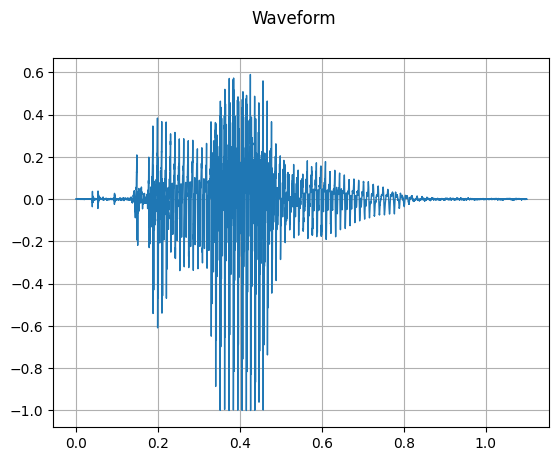

In [192]:
# from torchaudio

def plot_waveform(waveform, sample_rate):
    waveform = waveform.numpy()

    num_channels, num_frames = waveform.shape
    time_axis = torch.arange(0, num_frames) / sample_rate

    figure, axes = plt.subplots(num_channels, 1)
    if num_channels == 1:
        axes = [axes]
    for c in range(num_channels):
        axes[c].plot(time_axis, waveform[c], linewidth=1)
        axes[c].grid(True)
        if num_channels > 1:
            axes[c].set_ylabel(f"Channel {c+1}")
    figure.suptitle("Waveform")
    
plot_waveform(waveform, sample_rate)

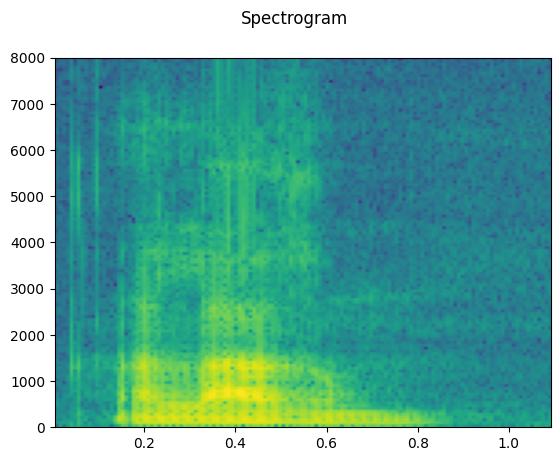

In [193]:
# from torchaudio

def plot_specgram(waveform, sample_rate, title="Spectrogram"):
    waveform = waveform.numpy()

    num_channels, num_frames = waveform.shape

    figure, axes = plt.subplots(num_channels, 1)
    if num_channels == 1:
        axes = [axes]
    for c in range(num_channels):
        axes[c].specgram(waveform[c], Fs=sample_rate)
        if num_channels > 1:
            axes[c].set_ylabel(f"Channel {c+1}")
    figure.suptitle(title)

plot_specgram(waveform, sample_rate)

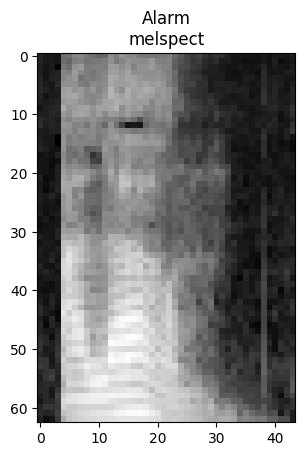

In [215]:
# plot a 2D image (here melspect)
my_test_key = "Alarm"
my_feature = "melspect"
my_test_sample = 100

data = get_numpy_array_with_id(word_id_dict, my_test_key, dataset_audio, my_test_sample)

plt.title(f"{data[0]}\n{my_feature}")
if indices_dict[my_feature][0] - indices_dict[my_feature][1] != 0:
    plt.imshow(np.flipud(data[2][indices_dict[my_feature][0]:indices_dict[my_feature][1],:]), cmap="gray")
else:
    plt.plot(data[2][indices_dict[my_feature][0]])

Spectograms looks similar! Means the "data understanding" is okay, there are no errors / misinterpretation of the numpy feature array! Thats good... :-)

## 2.3 Plot waveform matrix of wav file (altougth we do not take these features...)

In [59]:
def plot_waveform_matrix(audios):

    num_examples = len(audios)
    
    num_channels = audios[list(audios.keys())[0]][1].shape[0]  # Assuming all waveforms have the same number of channels

    fig, axes = plt.subplots(5, 4, figsize=(20, 20))
    
    for i, (k, v) in enumerate(audios.items()):
        filename, waveform, sample_rate = v
        
        row = i // 4
        col = i % 4

        waveform = waveform.numpy()
        num_frames = waveform.shape[1]
        time_axis = torch.arange(0, num_frames) / sample_rate

        for c in range(num_channels):
            axes[row, col].plot(time_axis, waveform[c], linewidth=1)
            axes[row, col].grid(True)
            axes[row, col].set_title(f"{os.path.basename(os.path.dirname(filename))}\nFile: {os.path.basename(filename)}")
            if num_channels > 1:
                axes[row, col].set_ylabel(f"Channel {c+1}")

    fig.suptitle("Waveforms")
    plt.tight_layout()

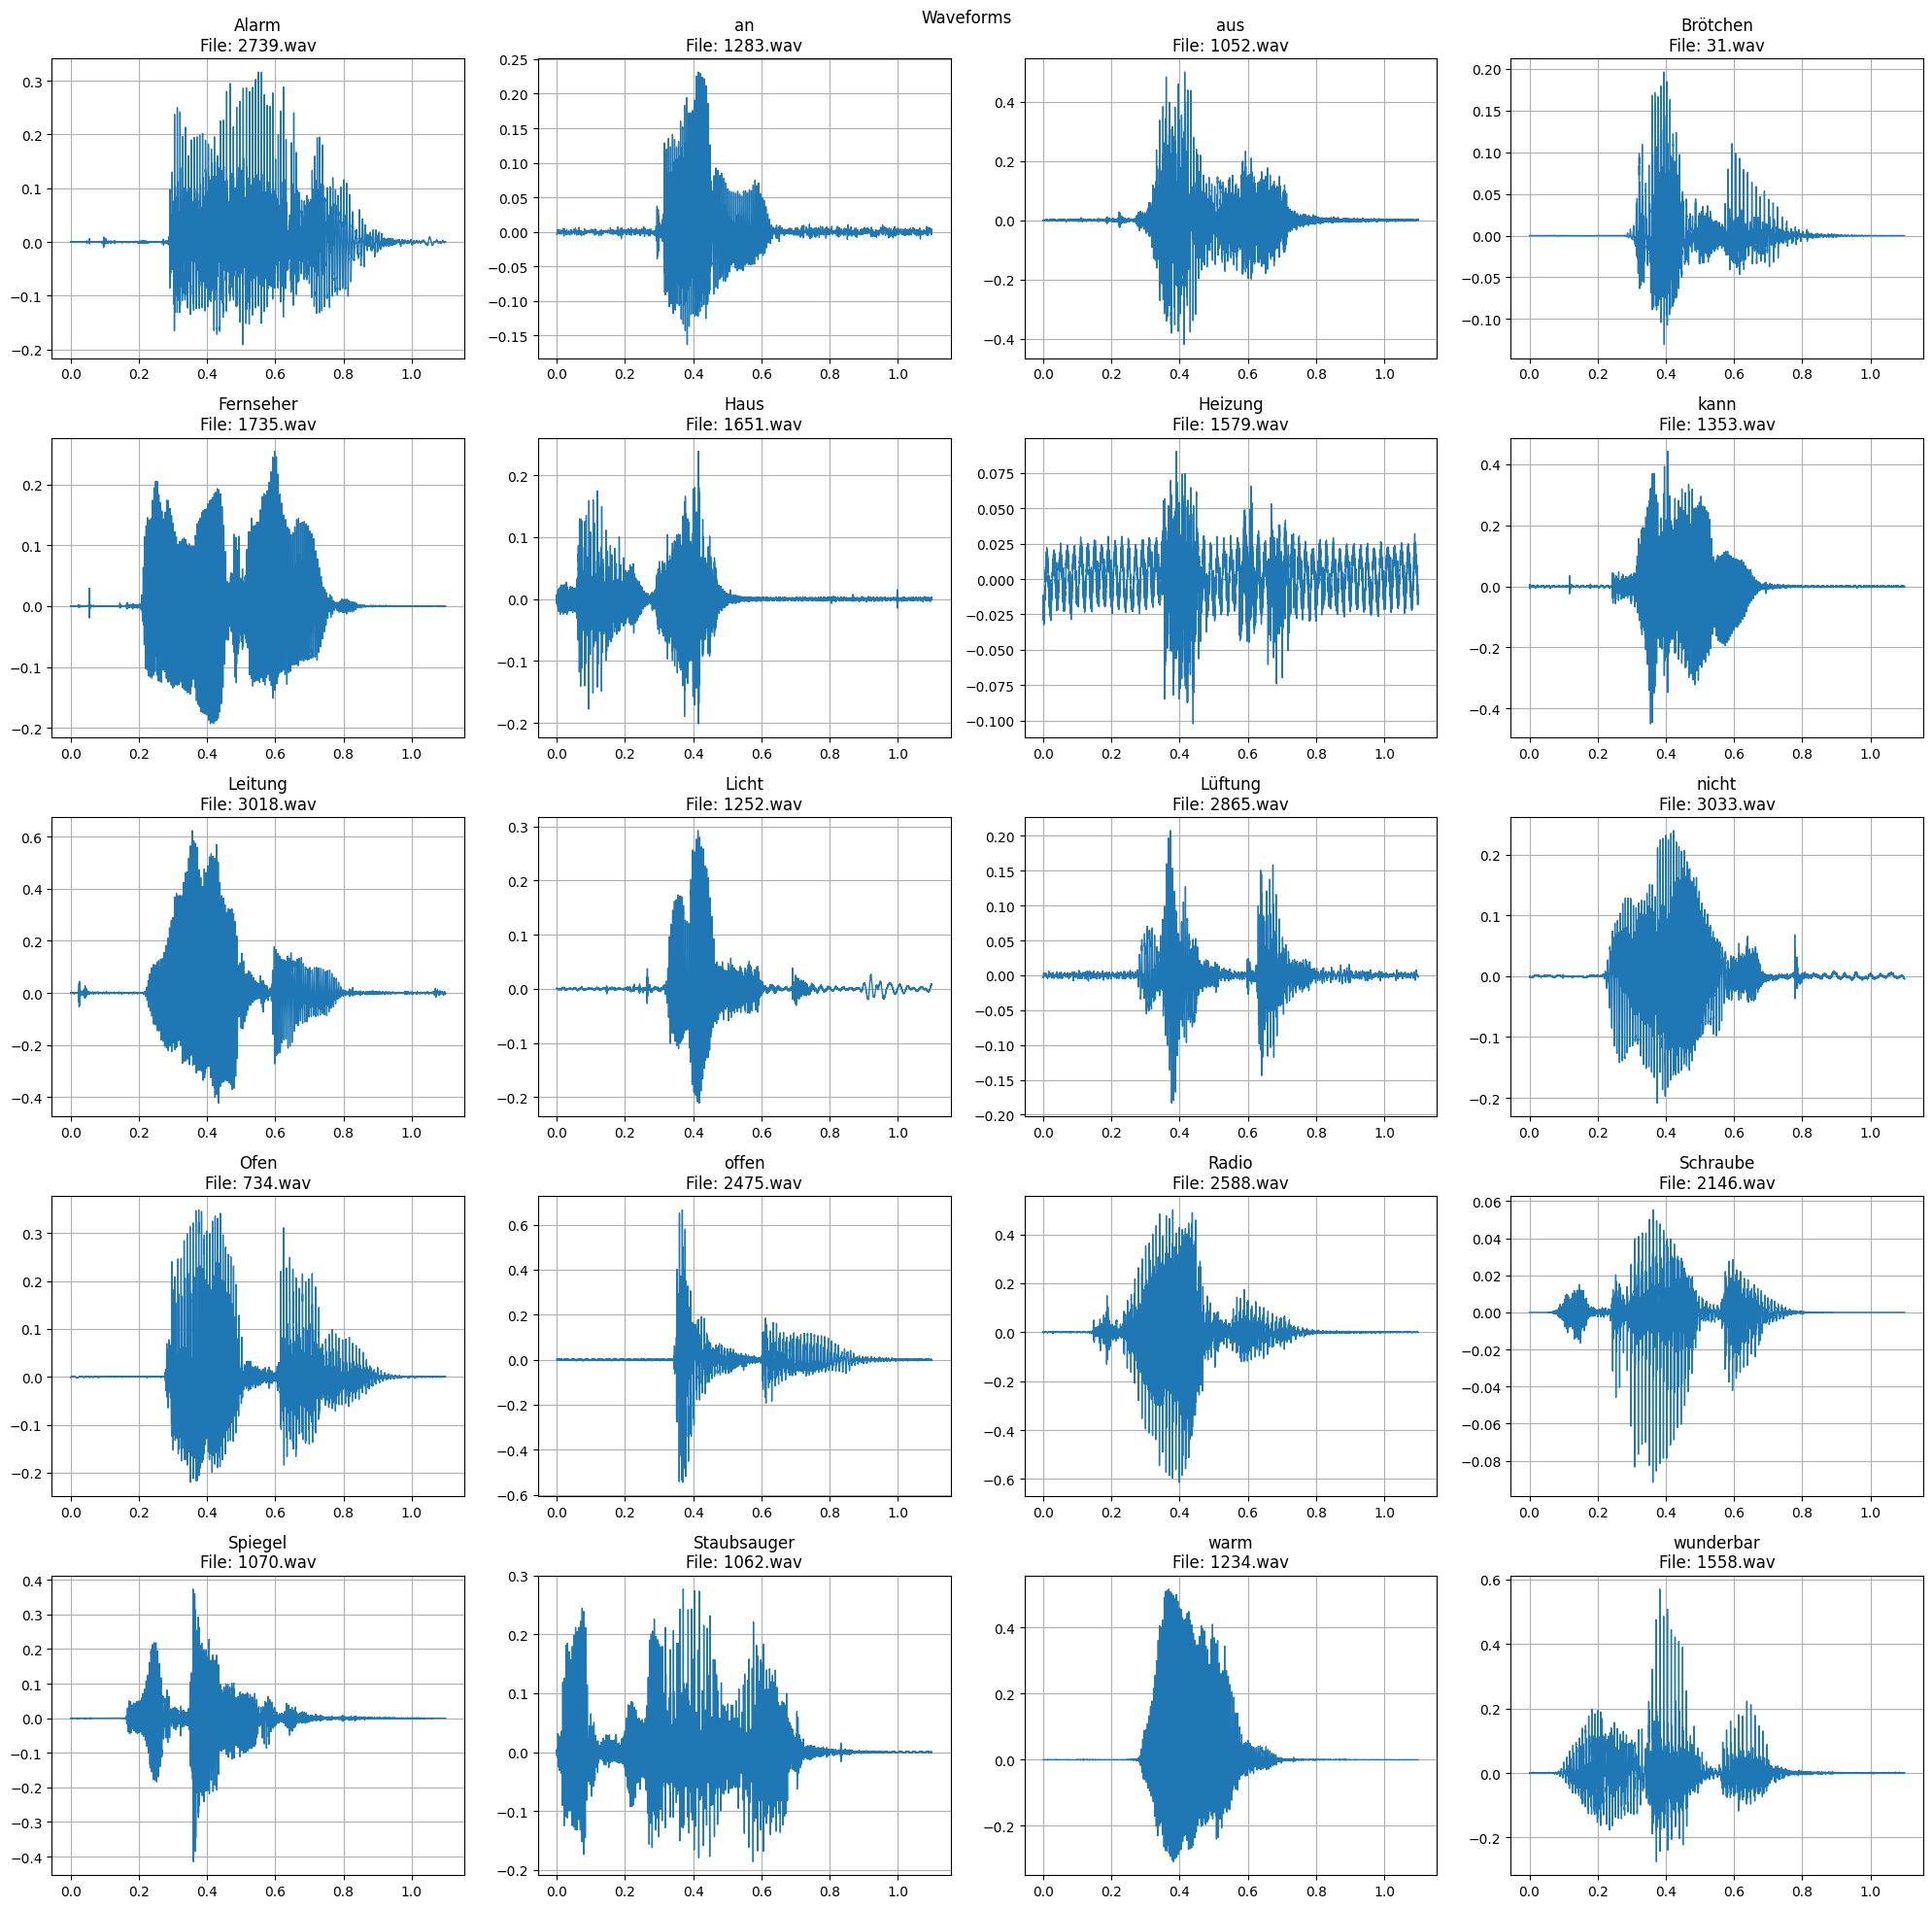

In [60]:
# RANDOM
random.seed(42)

audios = {}
for k, v in annotated_classes_dict.items():
    random_sample = random.randint(0, len(v))
    filename = v[random_sample]
    waveform, sample_rate = torchaudio.load(v[random_sample])
    audios[k] = (filename, waveform, sample_rate)

del audios["other"]

plot_waveform_matrix(audios)

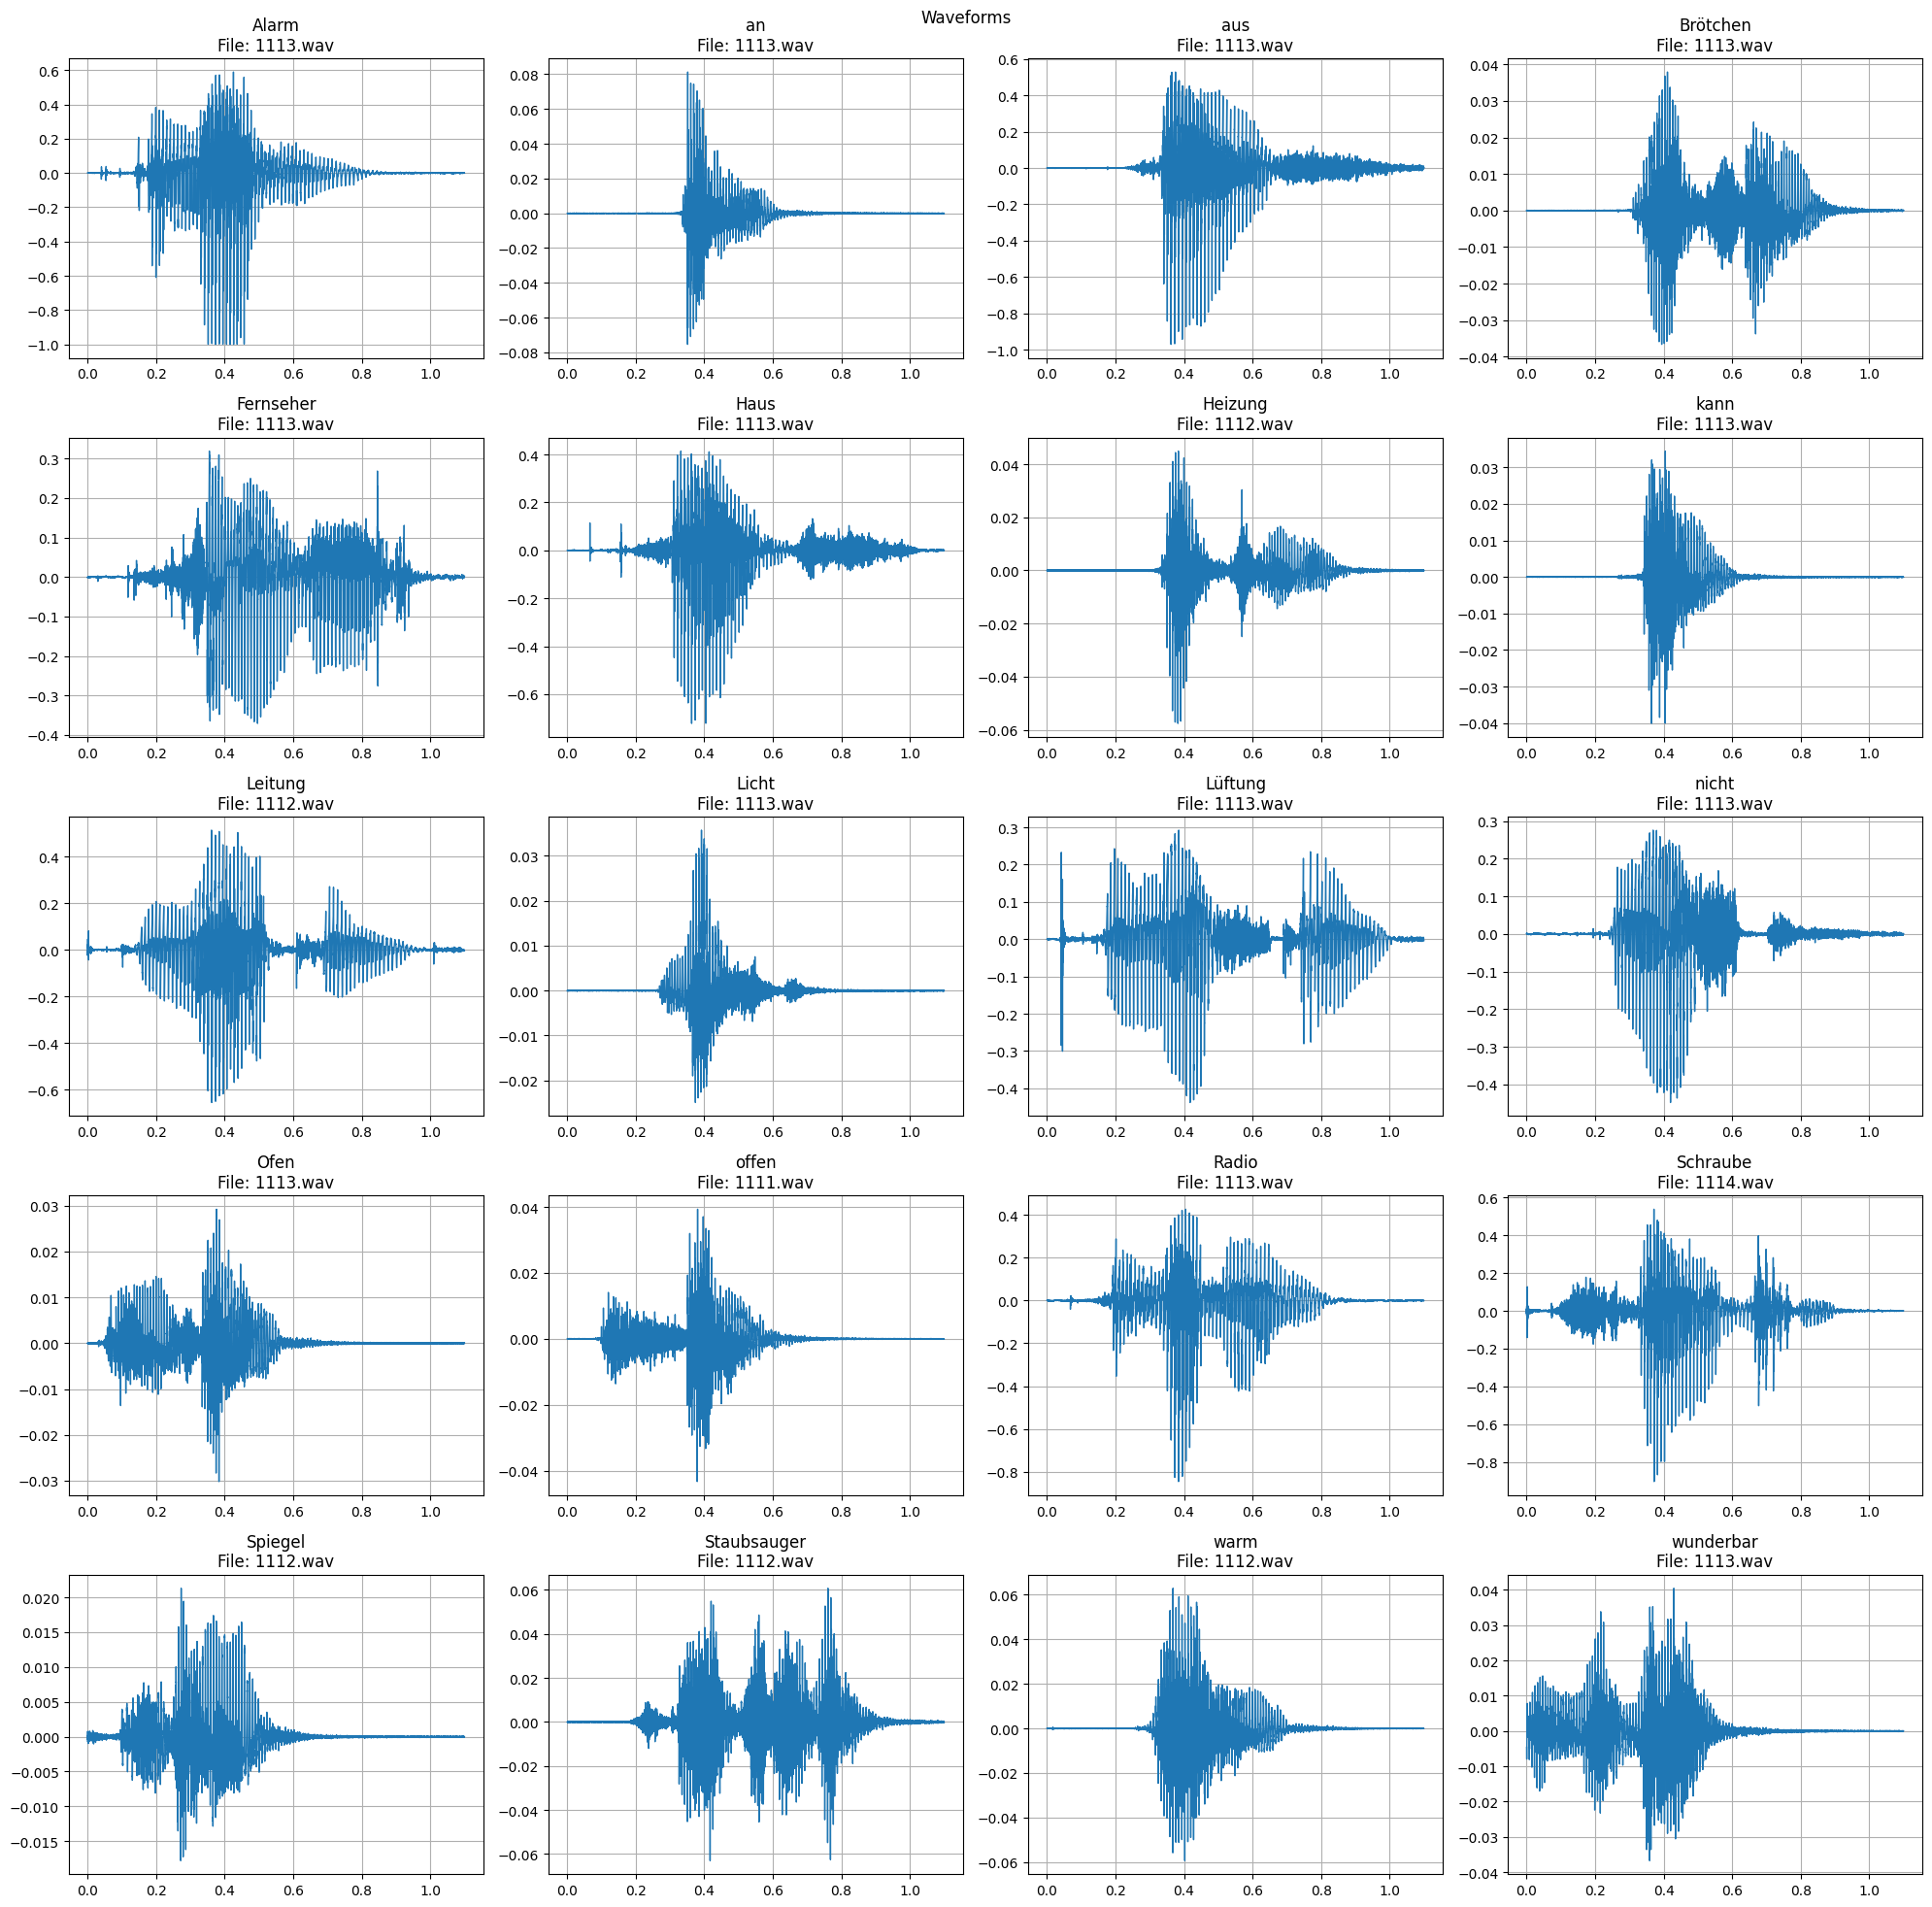

In [61]:
# NOT RANDOM
my_list_idx = 100

audios = {}
for k, v in annotated_classes_dict.items():
    filename = v[my_list_idx]
    waveform, sample_rate = torchaudio.load(v[my_list_idx])
    audios[k] = (filename, waveform, sample_rate)

del audios["other"]

plot_waveform_matrix(audios)

## 2.4 Now we want to compare samples from same class

In [62]:
# just for copying the key you need...
for annotated_class, files in annotated_classes_dict.items():
    print(f"{annotated_class}", end = "    ")

Alarm    an    aus    Brötchen    Fernseher    Haus    Heizung    kann    Leitung    Licht    Lüftung    nicht    Ofen    offen    other    Radio    Schraube    Spiegel    Staubsauger    warm    wunderbar    

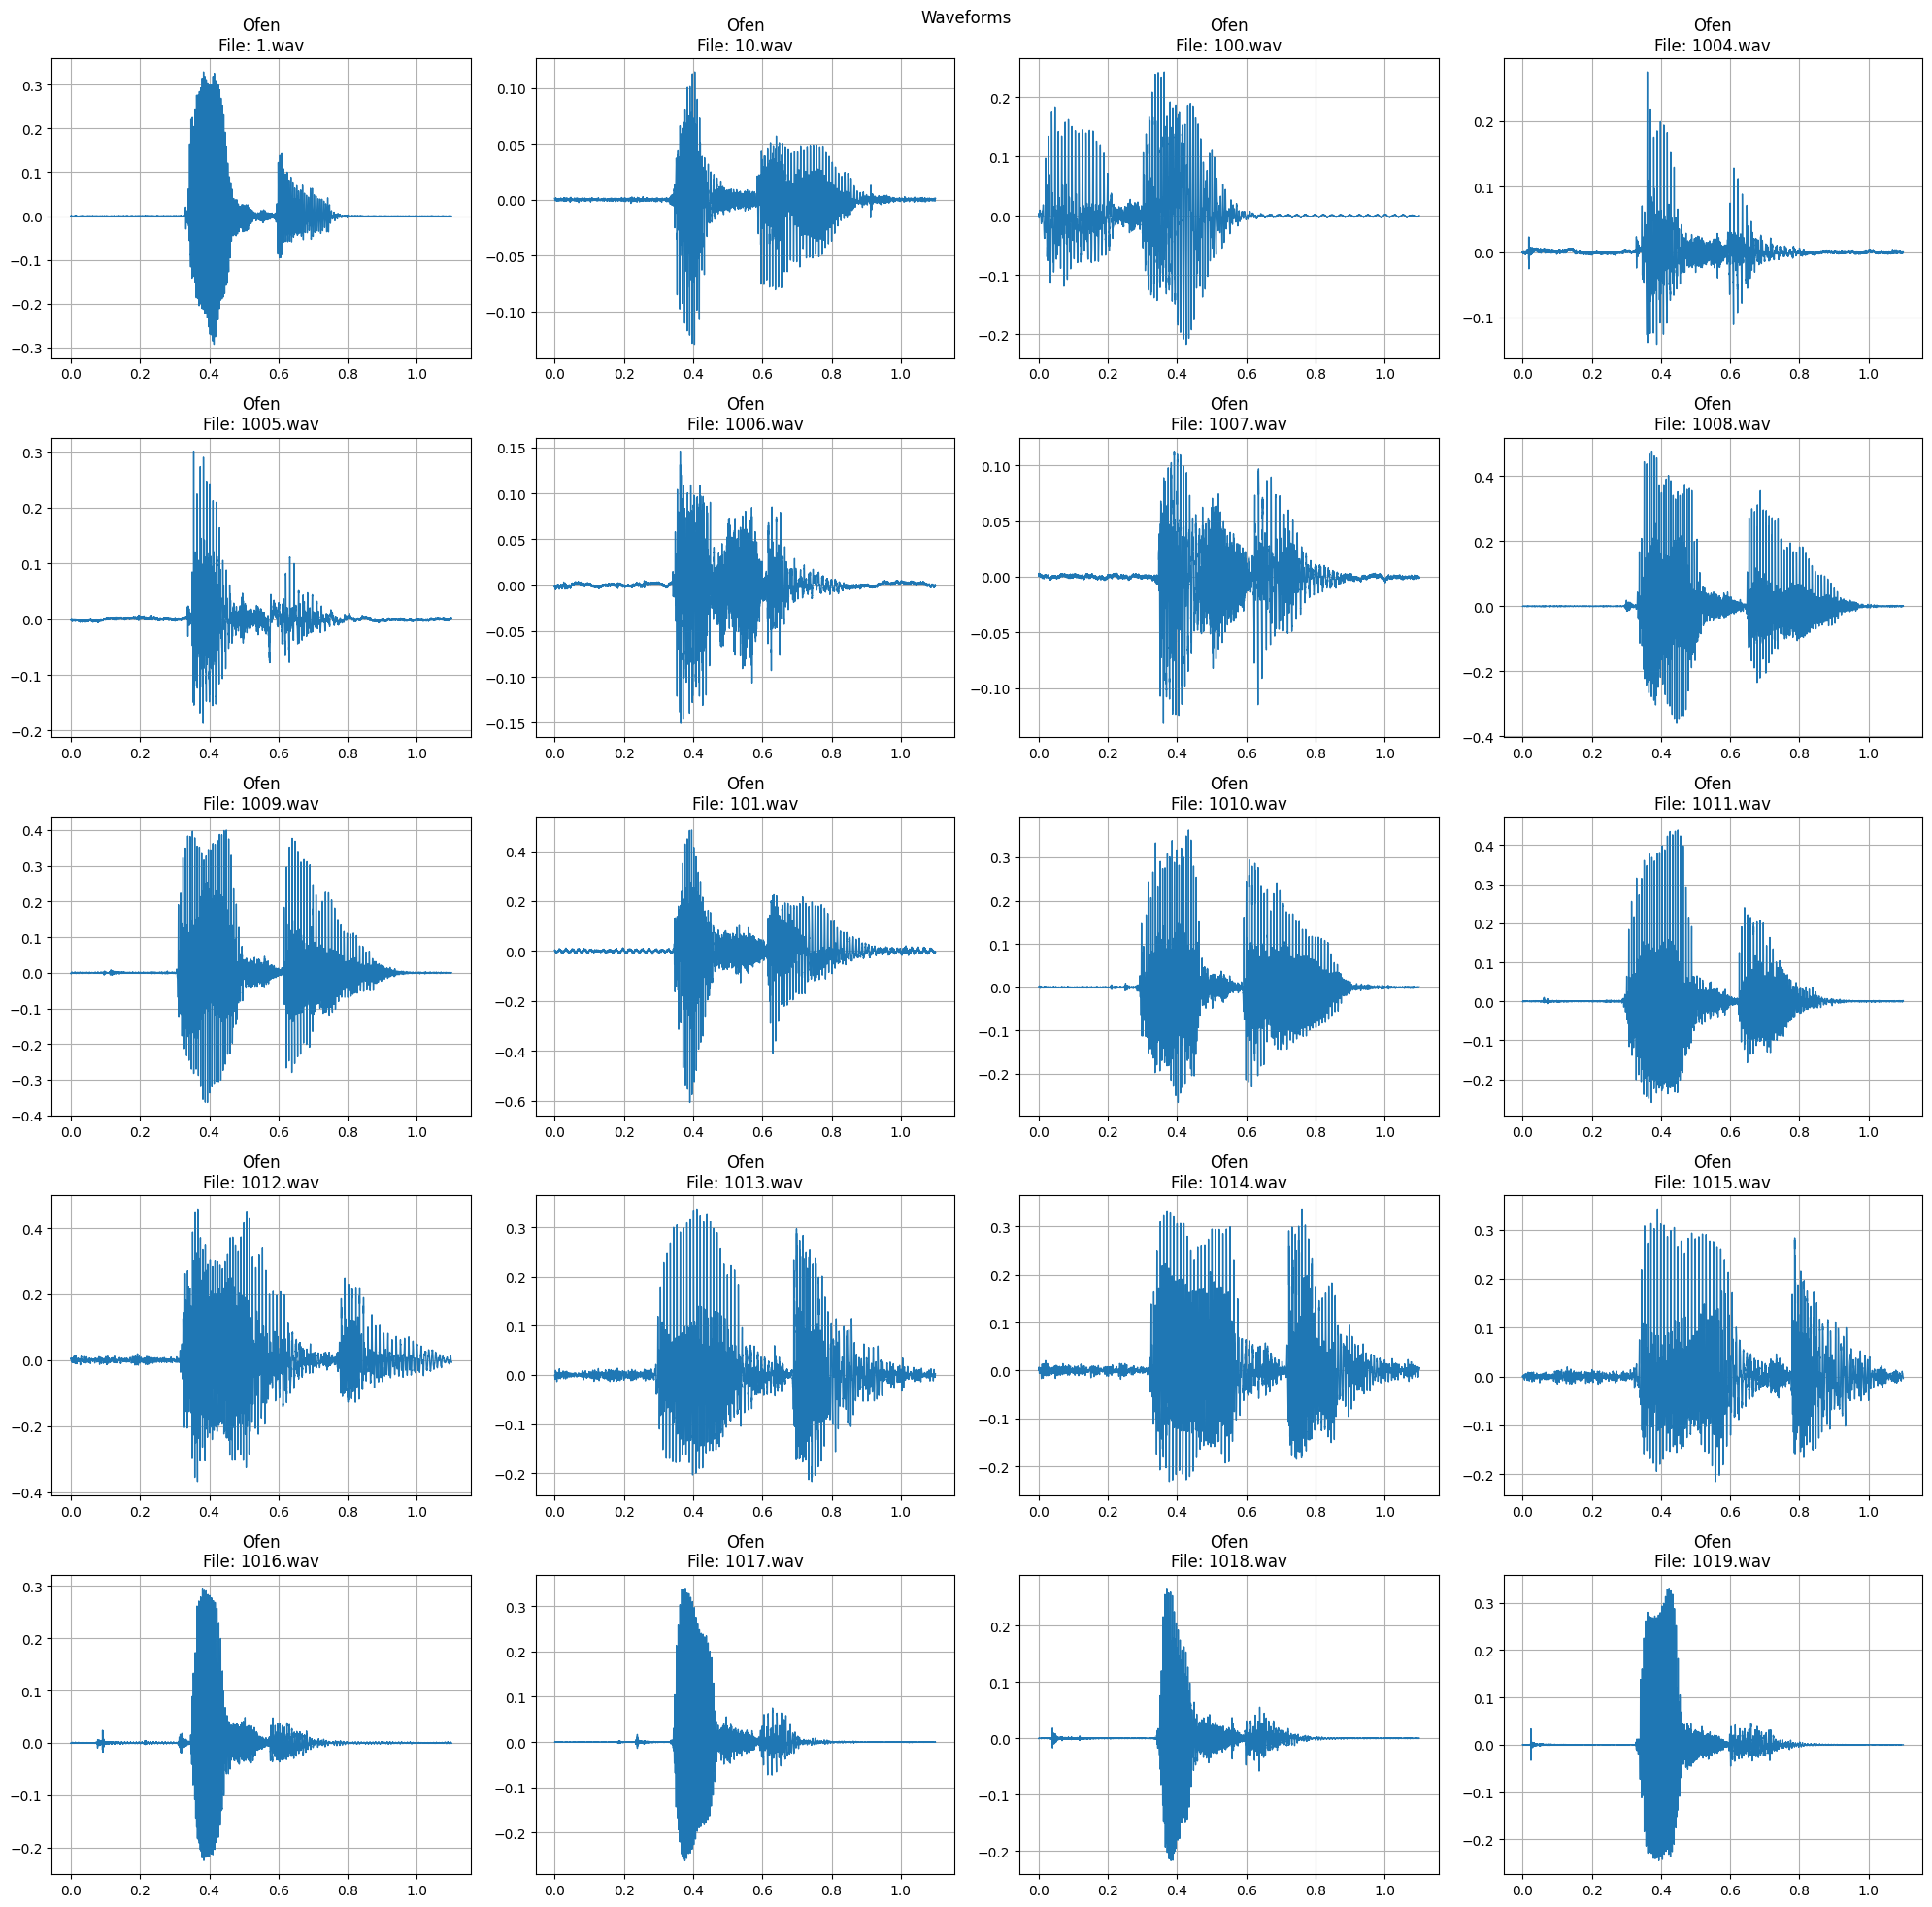

In [63]:
# NOT RANDOM
my_sample_class = "Ofen"
my_list_idx = 100
start_pos = 0

audios = {}
for i in range(start_pos, 20):
    filename = annotated_classes_dict[my_sample_class][i]
    waveform, sample_rate = torchaudio.load(filename)
    audios[i] = (filename, waveform, sample_rate)

plot_waveform_matrix(audios)

## 2.4 Now we want to compare samples from 2 different classes

In [64]:
# just for copying the key you need...
for annotated_class, files in annotated_classes_dict.items():
    print(f"{annotated_class}", end = "    ")

Alarm    an    aus    Brötchen    Fernseher    Haus    Heizung    kann    Leitung    Licht    Lüftung    nicht    Ofen    offen    other    Radio    Schraube    Spiegel    Staubsauger    warm    wunderbar    

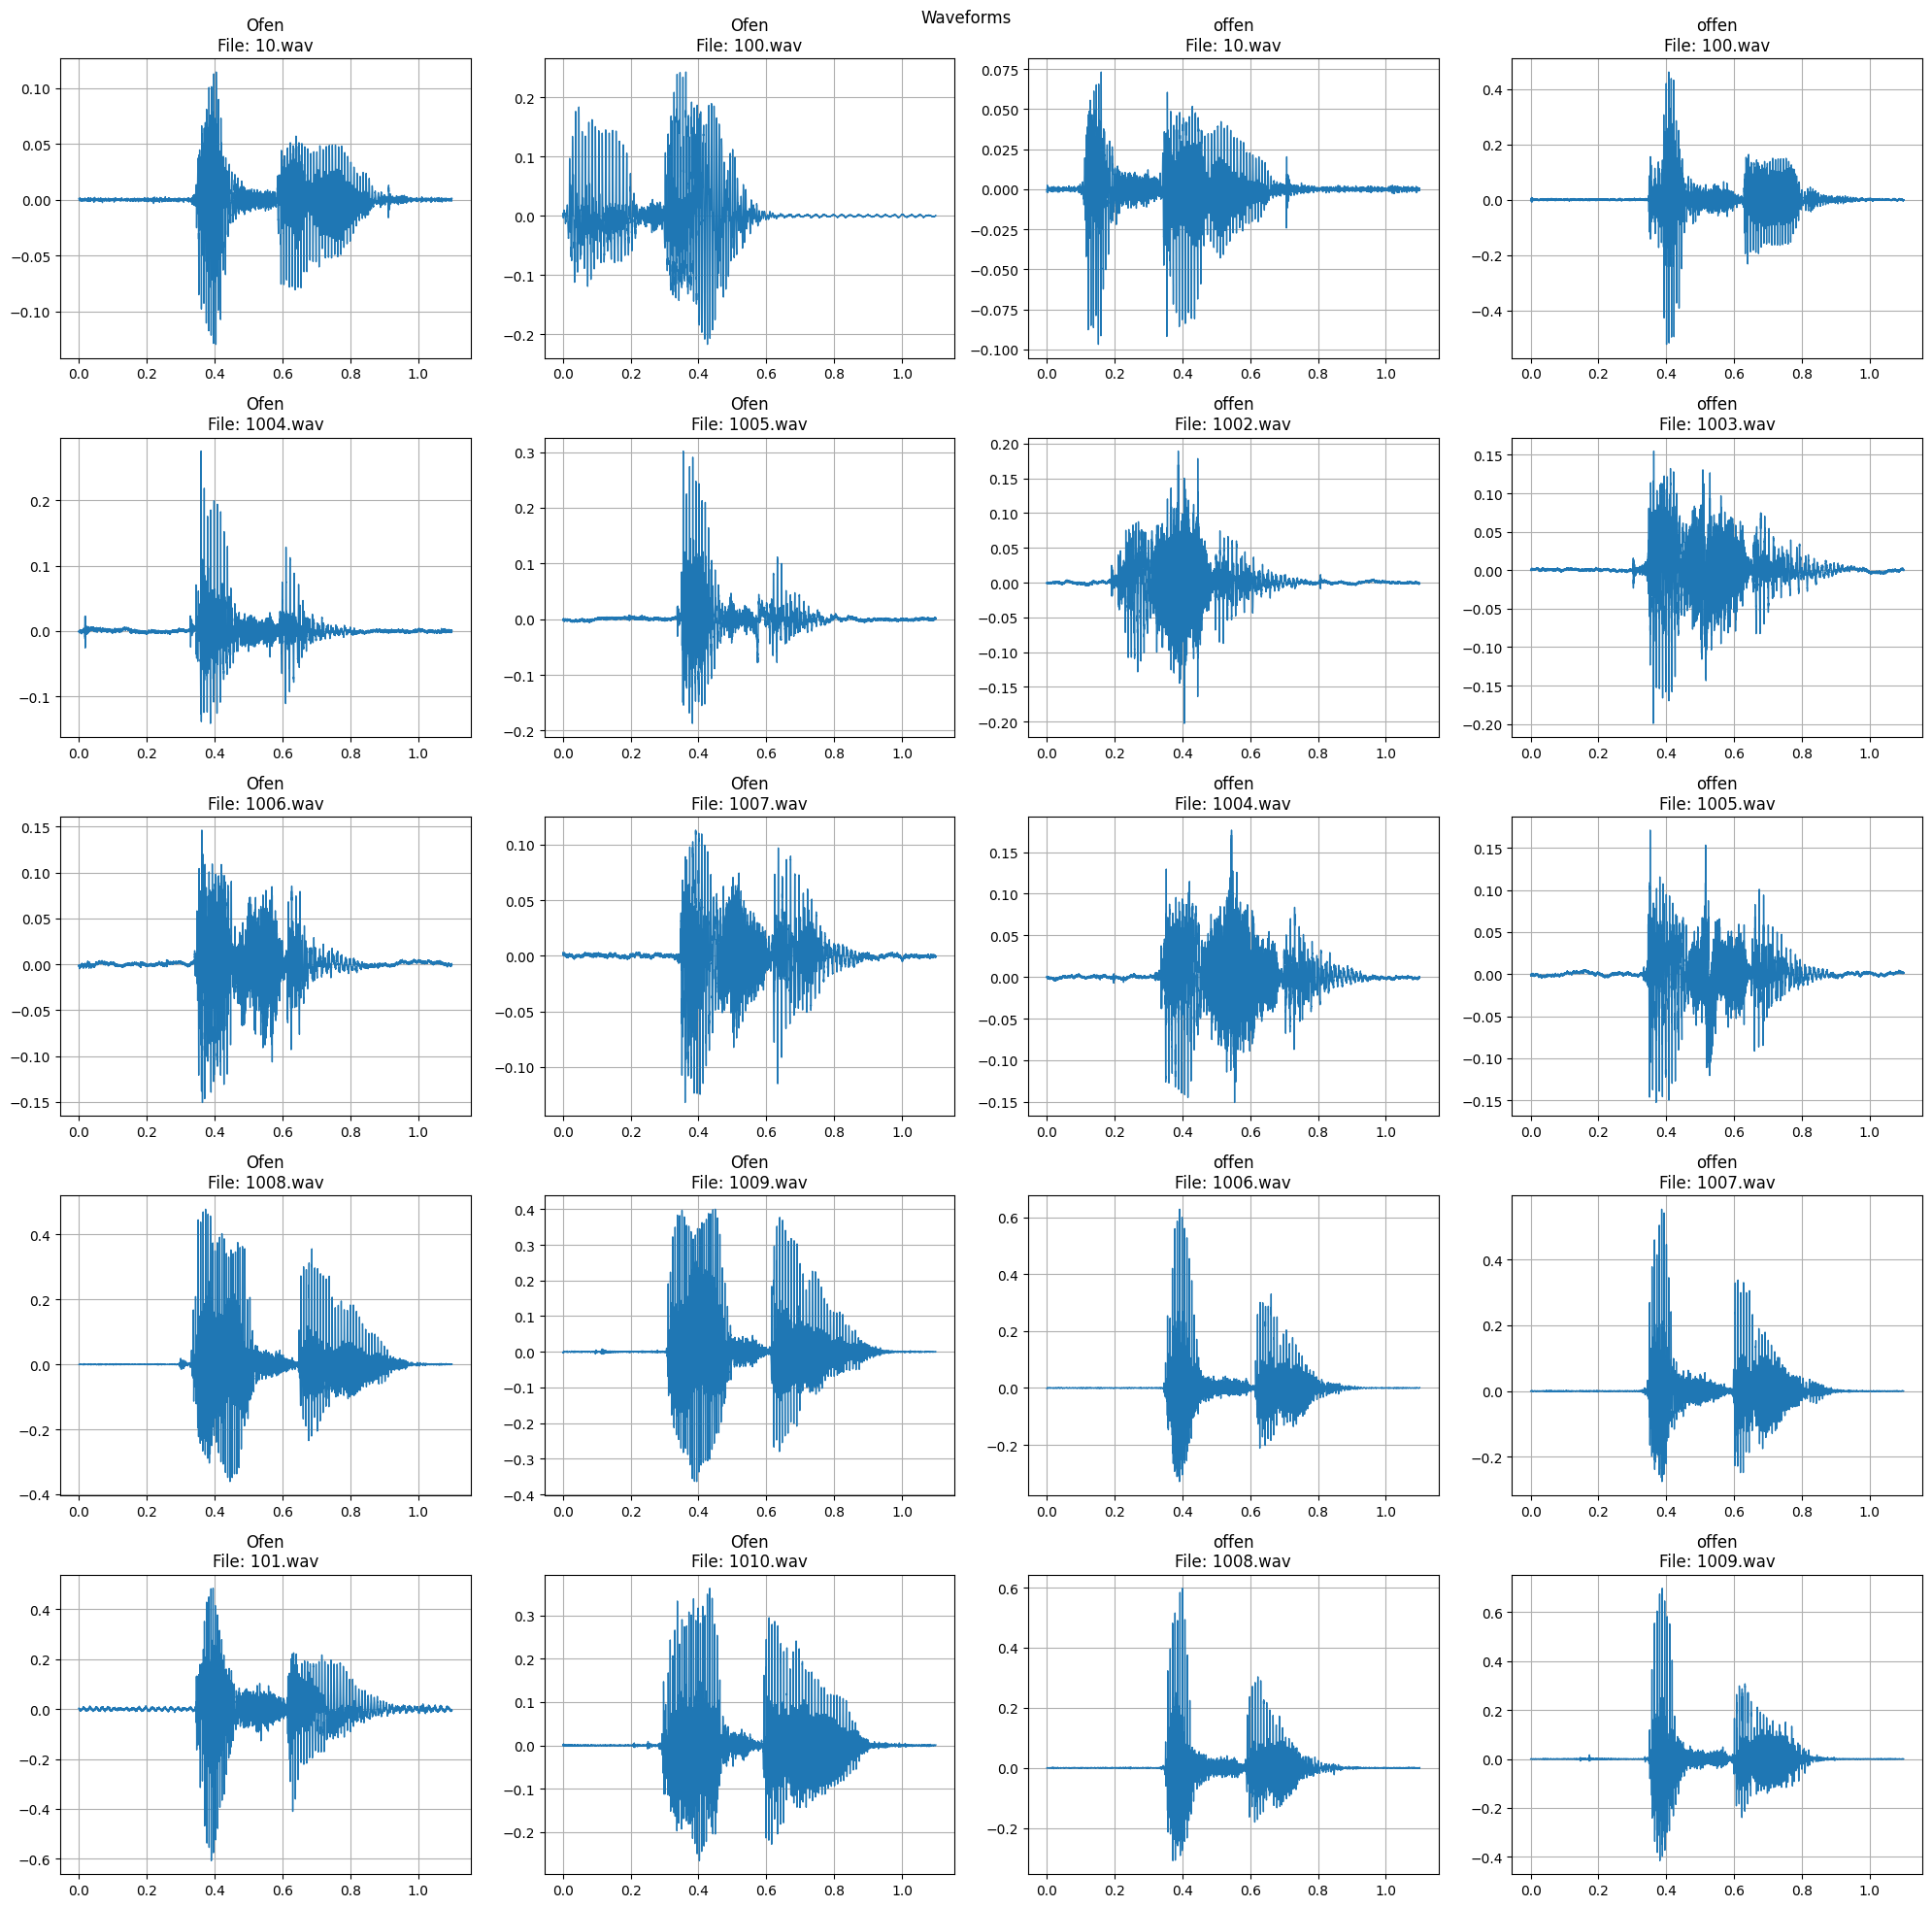

In [65]:
# NOT RANDOM
my_sample_class_1 = "Ofen"
my_sample_class_2 = "offen"
start_pos = 0
counter_1, counter_2 = 0, 0

audios = {}
for i in range(5):
    for j in range(4):
        if j <= 1:
            my_sample_class = my_sample_class_1
            counter_1 += 1
            counter = counter_1
        else:
            my_sample_class = my_sample_class_2
            counter_2 += 1
            counter = counter_2
        
        filename = annotated_classes_dict[my_sample_class][counter + start_pos]
        waveform, sample_rate = torchaudio.load(filename)
        audios[i*5 + j] = (filename, waveform, sample_rate)      
plot_waveform_matrix(audios)

In [66]:
# NOT RANDOM, you can choose and it stays the same
my_test_key = "offen"
my_test_sample = 9

print(f"The max len to choose is: {len(annotated_classes_dict[my_test_key])}")

print(f"Play some random audio file of key {my_test_key}...")
print("")

# play audio file
audio_file = annotated_classes_dict[my_test_key][my_test_sample]
print(audio_file)
IPython.display.display(ipd.Audio(audio_file))

The max len to choose is: 2039
Play some random audio file of key offen...

Files/MLPC24_speech_commands_raw_waveforms\offen\1008.wav


# 3. Now lets check the extraced features of the audio dataset (which is the main task)

## 3.1 Plot 1 feature 

This is 1 feature (which we saw earlier...)

In [209]:
# just for copying the key you need...
for annotated_class, files in indices_dict.items():
    print(f"{annotated_class}", end = "    ")

bandwidth    centroid    contrast    energy    flatness    flux    melspect    mfcc    mfcc_d    mfcc_d2    power    yin    zcr    

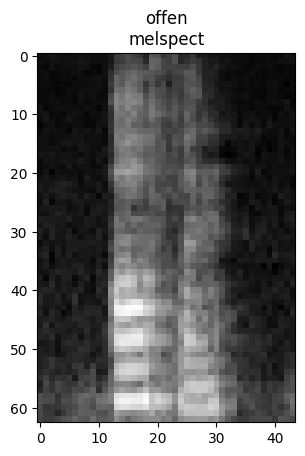

In [217]:
# plot a 2D image (here melspect)
my_test_key = "offen"
my_feature = "melspect"
my_test_sample = 0

data = get_numpy_array_with_id(word_id_dict, my_test_key, dataset_audio, my_test_sample)

plt.title(f"{data[0]}\n{my_feature}")
if indices_dict[my_feature][0] - indices_dict[my_feature][1] != 0:
    plt.imshow(np.flipud(data[2][indices_dict[my_feature][0]:indices_dict[my_feature][1],:]), cmap="gray")
else:
    plt.plot(data[2][indices_dict[my_feature][0]])

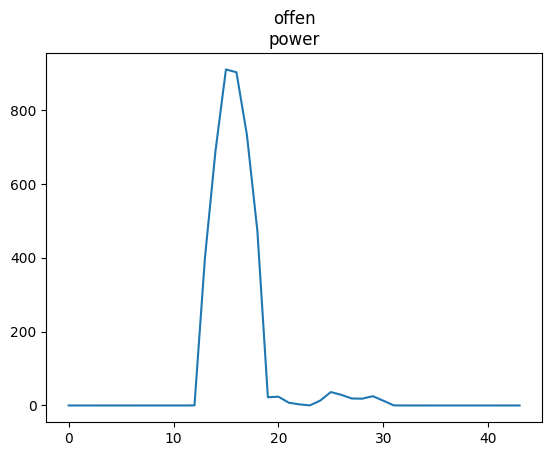

In [216]:
# plot a 1d plot (here power)
my_test_key = "offen"
my_feature = "power"
my_test_sample = 0

data = get_numpy_array_with_id(word_id_dict, my_test_key, dataset_audio, my_test_sample)

plt.title(f"{data[0]}\n{my_feature}")
if indices_dict[my_feature][0] - indices_dict[my_feature][1] != 0:
    plt.imshow(np.flipud(data[2][indices_dict[my_feature][0]:indices_dict[my_feature][1],:]), cmap="gray")
else:
    plt.plot(data[2][indices_dict[my_feature][0]])

## 3.2 Plot a feature matrix with all features in one matrix... :-)

In [210]:
# just for copying the key you need...
for annotated_class, files in indices_dict.items():
    print(f"{annotated_class}", end = "    ")

bandwidth    centroid    contrast    energy    flatness    flux    melspect    mfcc    mfcc_d    mfcc_d2    power    yin    zcr    

In [71]:
desired_order_list = ["melspect", 
                      "mfcc",
                      "mfcc_d",
                      "mfcc_d2",
                      "energy",
                      "power",
                      "yin",
                      "zcr",
                      "bandwidth",
                      "centroid",
                      "flatness",
                      "flux",
                      "contrast"]
reordered_dict = {k: indices_dict[k] for k in desired_order_list}

# Example usage:
print(reordered_dict)

{'melspect': (12, 75), 'mfcc': (76, 107), 'mfcc_d': (108, 139), 'mfcc_d2': (140, 171), 'energy': (9, 9), 'power': (172, 172), 'yin': (173, 173), 'zcr': (174, 174), 'bandwidth': (0, 0), 'centroid': (1, 1), 'flatness': (10, 10), 'flux': (11, 11), 'contrast': (2, 8)}


In [218]:
def plot_feature_matrix(word_id_dict, my_test_key, dataset_audio, start=0, random=False):

    fig, axes = plt.subplots(4, 4, figsize=(20, 20))

    # Iterate over each feature in indices_dict
    for i, (feature_name, feature_indices) in enumerate(reordered_dict.items()):
        data = get_numpy_array_with_id(word_id_dict, my_test_key, dataset_audio, i)
        row = i // 4
        col = i % 4

        axes[row, col].set_title(f"{feature_name}")
        
        if feature_indices[0] - feature_indices[1] != 0:
            axes[row, col].imshow(np.flipud(data[2][feature_indices[0]:feature_indices[1], :]), cmap="gray")
        else:
            axes[row, col].plot(data[2][feature_indices[0]])
        
        axes[row, col].grid(True)
            
    fig.suptitle(f"Audio Features \"{my_test_key}\"")
    plt.tight_layout()


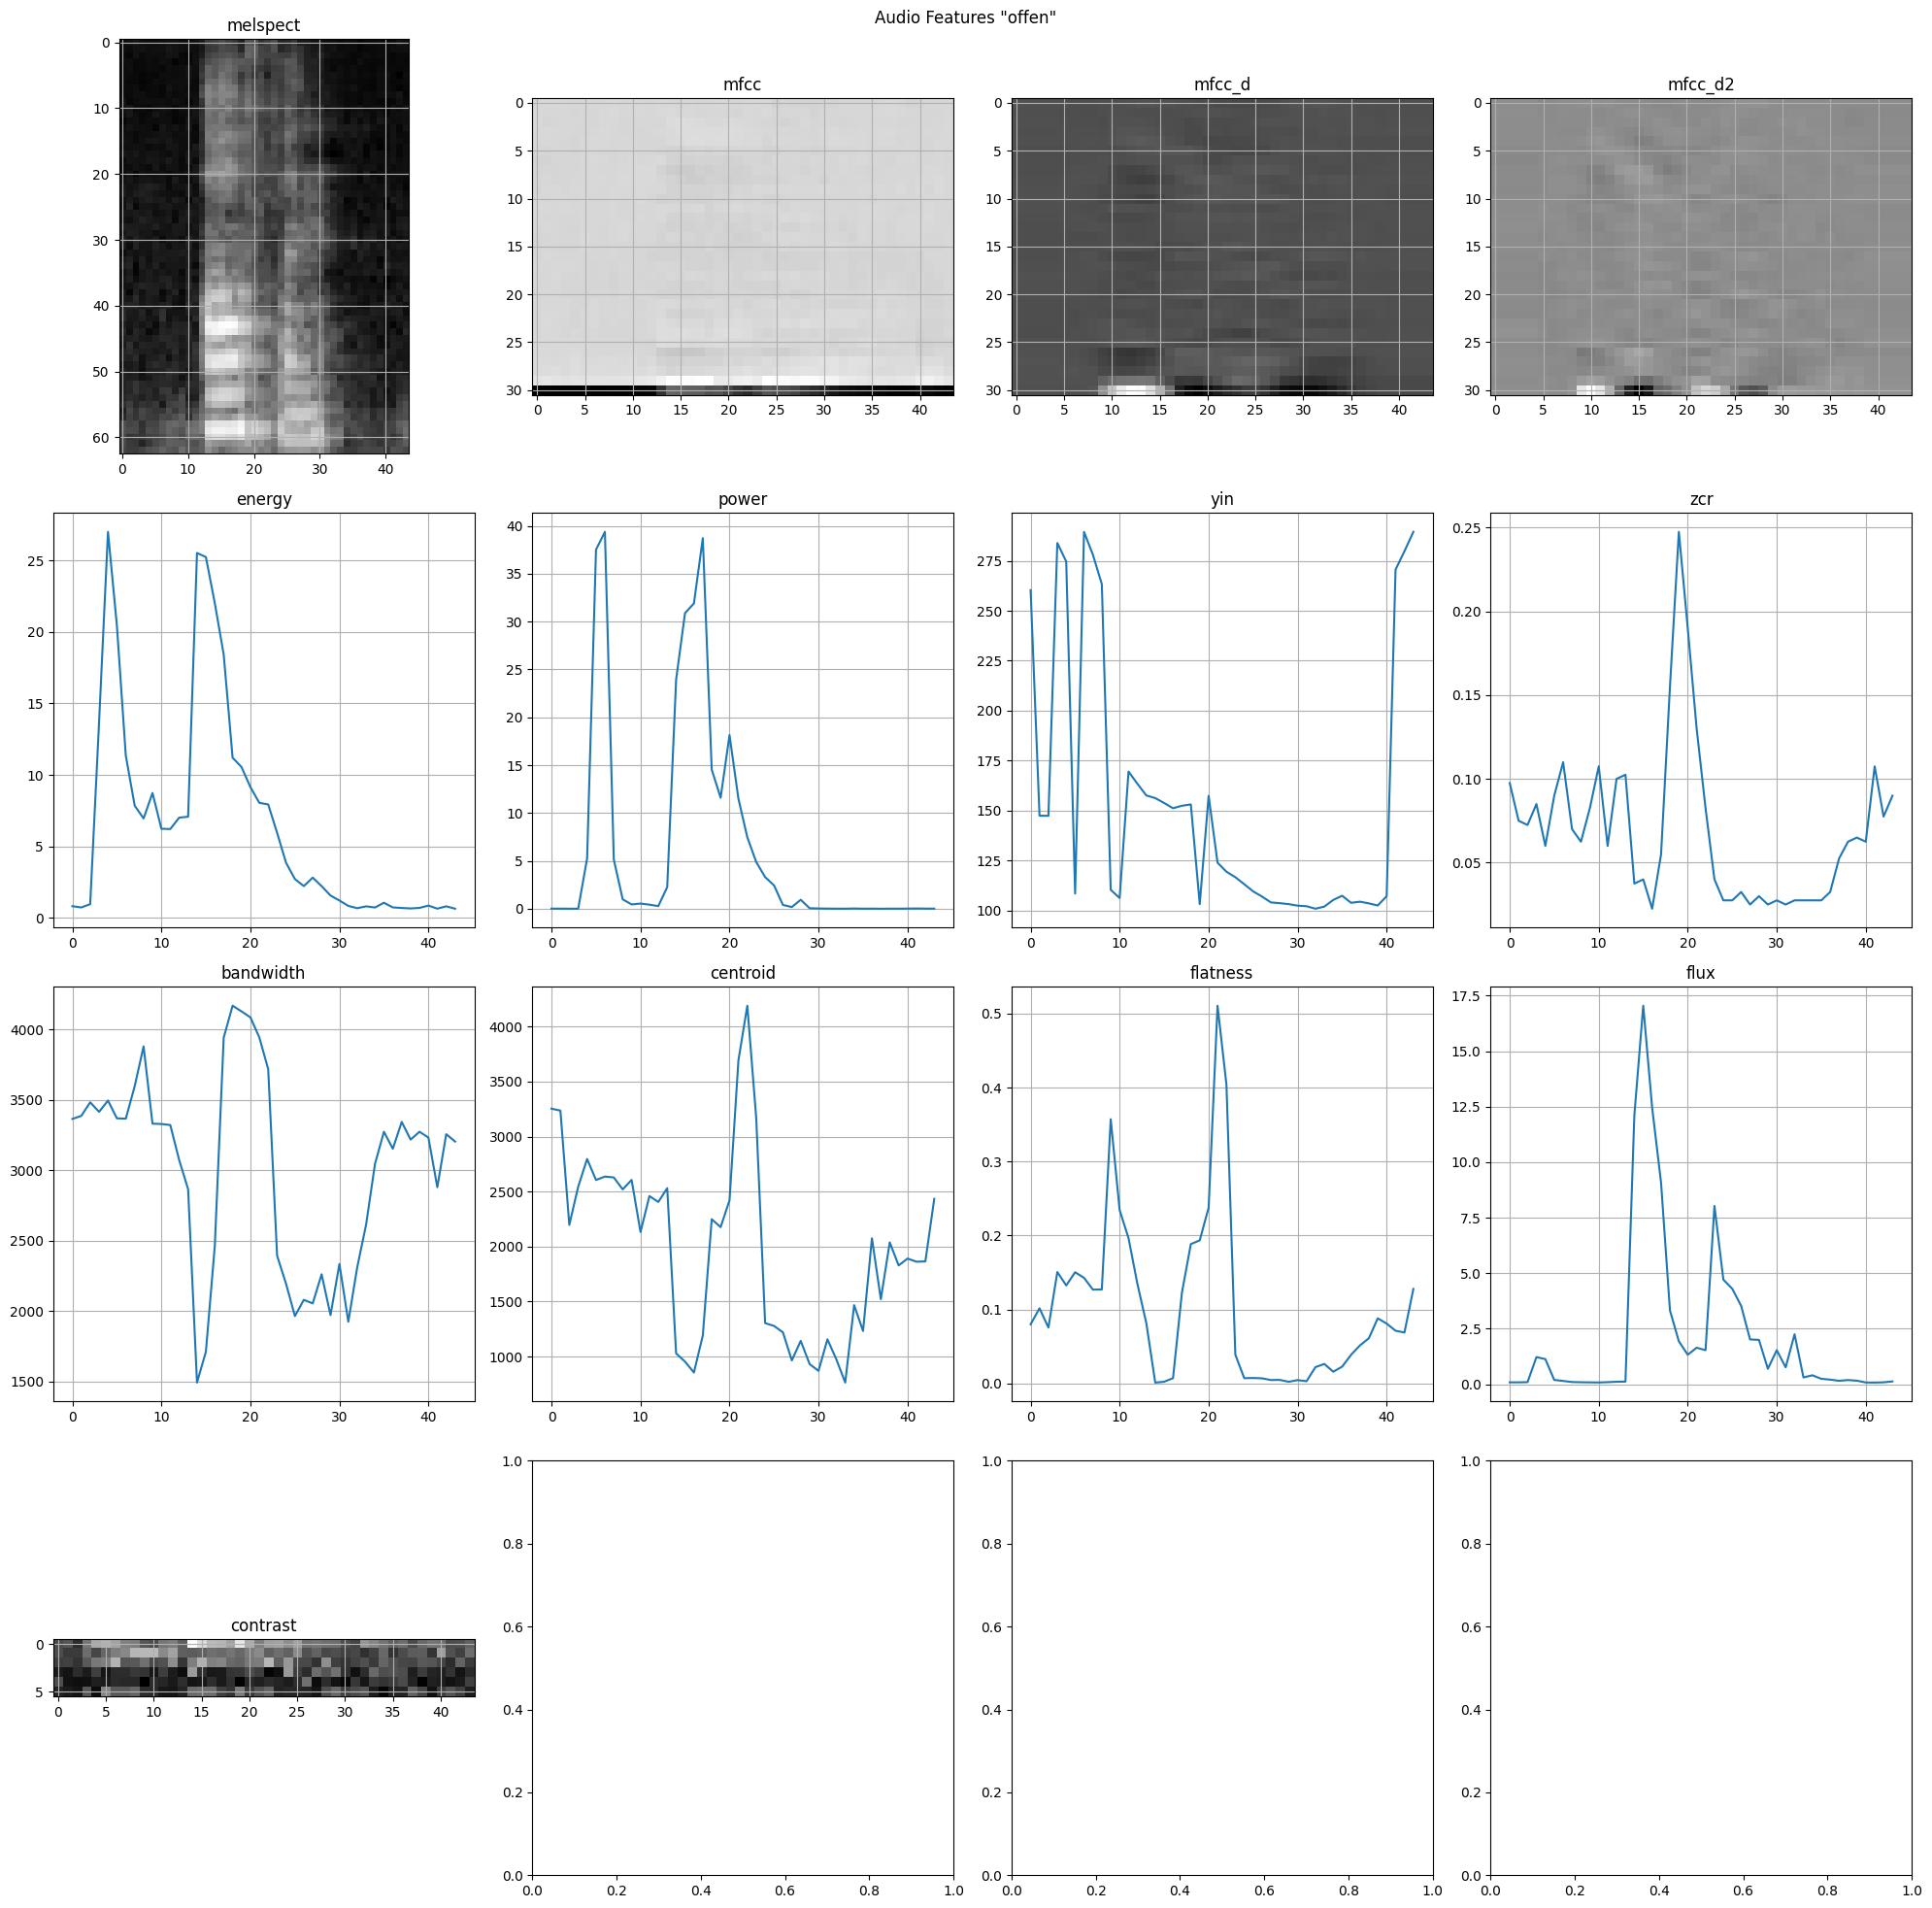

In [219]:
my_test_key = "offen"
plot_feature_matrix(word_id_dict, my_test_key, dataset_audio, i)

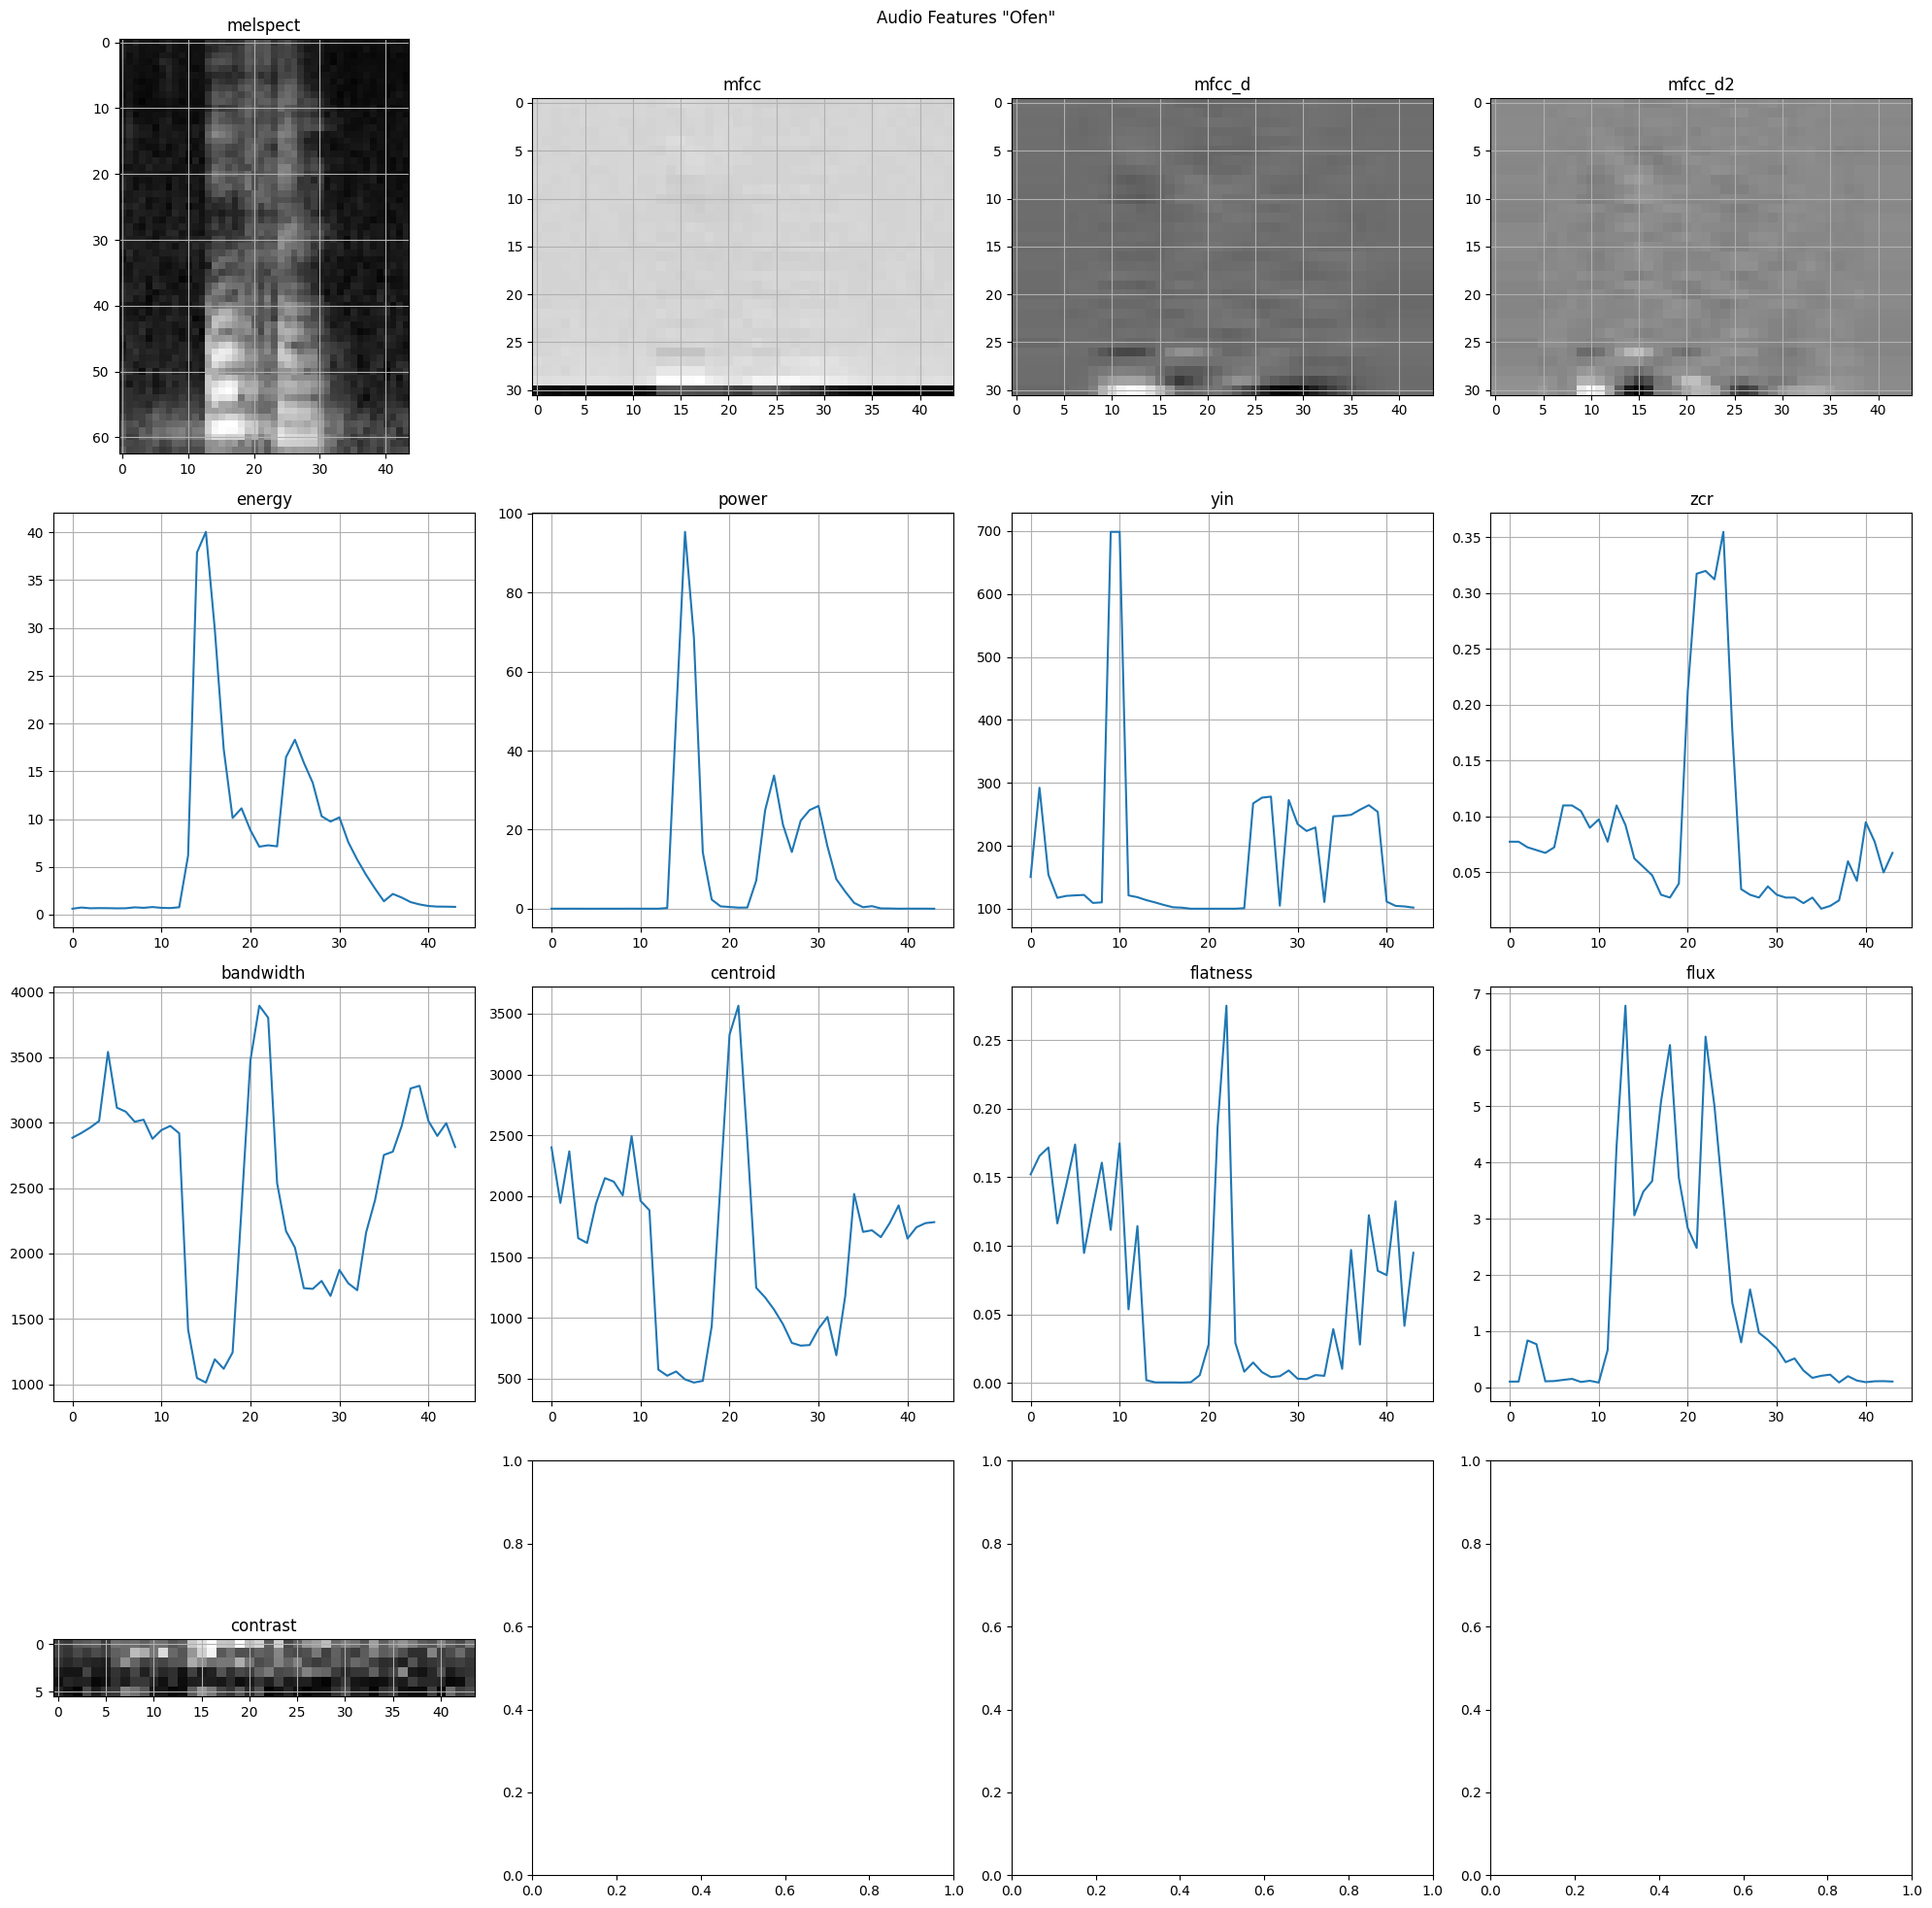

In [220]:
my_test_key = "Ofen"
plot_feature_matrix(word_id_dict, my_test_key, dataset_audio, i)

## 3.3 Put desired features in a row

In [226]:
def plot_feature_row(word_id_dict, my_test_key, my_feature_list, dataset_audio, start=0, random=False):

    fig, axes = plt.subplots(1, len(my_feature_list), figsize=(20, 20))

    # Iterate over each feature in indices_dict
    for i, (feature_name, feature_indices) in enumerate(reordered_dict.items()):
        if feature_name not in my_feature_list:
            continue

        data = get_numpy_array_with_id(word_id_dict, my_test_key, dataset_audio, i)
        col = i % len(my_feature_list)  # Adjust the column index based on the length of my_feature_list

        axes[col].set_title(f"{feature_name}")
        
        if feature_indices[0] - feature_indices[1] != 0:
            axes[col].imshow(np.flipud(data[2][feature_indices[0]:feature_indices[1], :]), cmap="gray")
        else:
            axes[col].plot(data[2][feature_indices[0]])
        
        axes[col].grid(True)
            
    fig.suptitle(f"Audio Features \"{my_test_key}\"")
    plt.tight_layout()

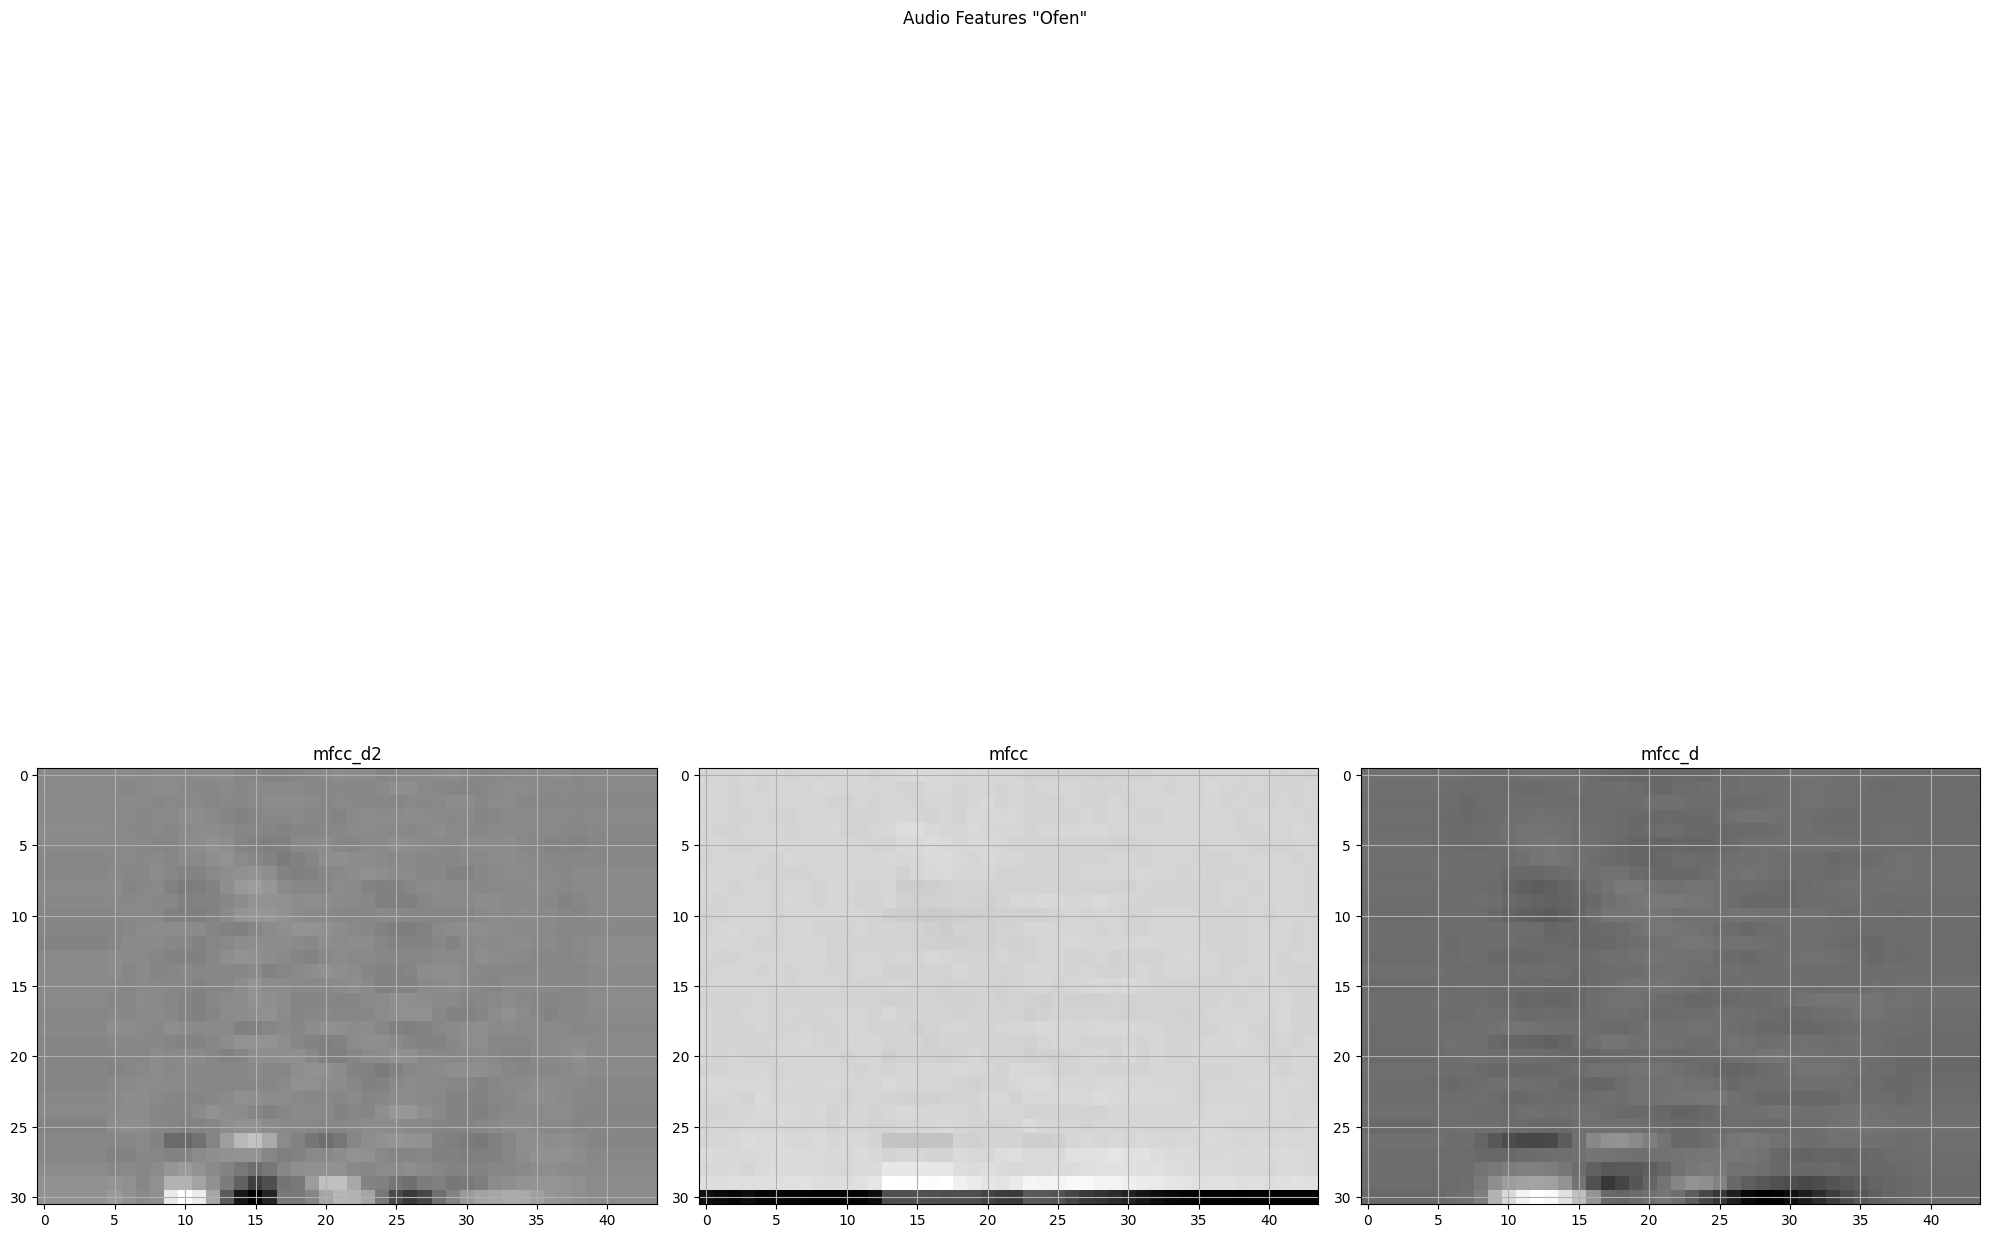

In [227]:
my_test_key = "Ofen"
my_feature_list = ["mfcc", "mfcc_d", "mfcc_d2"]
plot_feature_row(word_id_dict, my_test_key, my_feature_list, dataset_audio, i)

## 3.4 Compare 1 feature with 2 different classes with a matrix plot

In [228]:
import random

def plot_feature_row(word_id_dict, my_test_key_list, my_feature_list, dataset_audio, start=0, random=False):

    fig, axes = plt.subplots(2, len(my_feature_list), figsize=(20, 20))

    # Iterate over each row (my_test_key)
    for j, my_test_key in enumerate(my_test_key_list):
        # Generate a random start value for i if random is True
        if random:
            start_value = random.randint(0, len(reordered_dict) - 1)
        else:
            start_value = start
        
        # Iterate over each feature in indices_dict
        for i, (feature_name, feature_indices) in enumerate(reordered_dict.items()):
            if feature_name not in my_feature_list:
                continue

            # Ensure that my_test_key is a single key, not a list
            if not isinstance(my_test_key, str):
                print(f"Error: Invalid key type for my_test_key: {my_test_key}")
                continue

            data = get_numpy_array_with_id(word_id_dict, my_test_key, dataset_audio, start_value + i)
            row = j
            col = i % len(my_feature_list)  # Adjust the column index based on the length of my_feature_list

            axes[row, col].set_title(f"Key: {my_test_key}, Feature: {feature_name}")
            
            if feature_indices[0] - feature_indices[1] != 0:
                axes[row, col].imshow(np.flipud(data[2][feature_indices[0]:feature_indices[1], :]), cmap="gray")
            else:
                axes[row, col].plot(data[2][feature_indices[0]])
            
            axes[row, col].grid(True)
                
    fig.suptitle("Audio Features")
    plt.tight_layout()


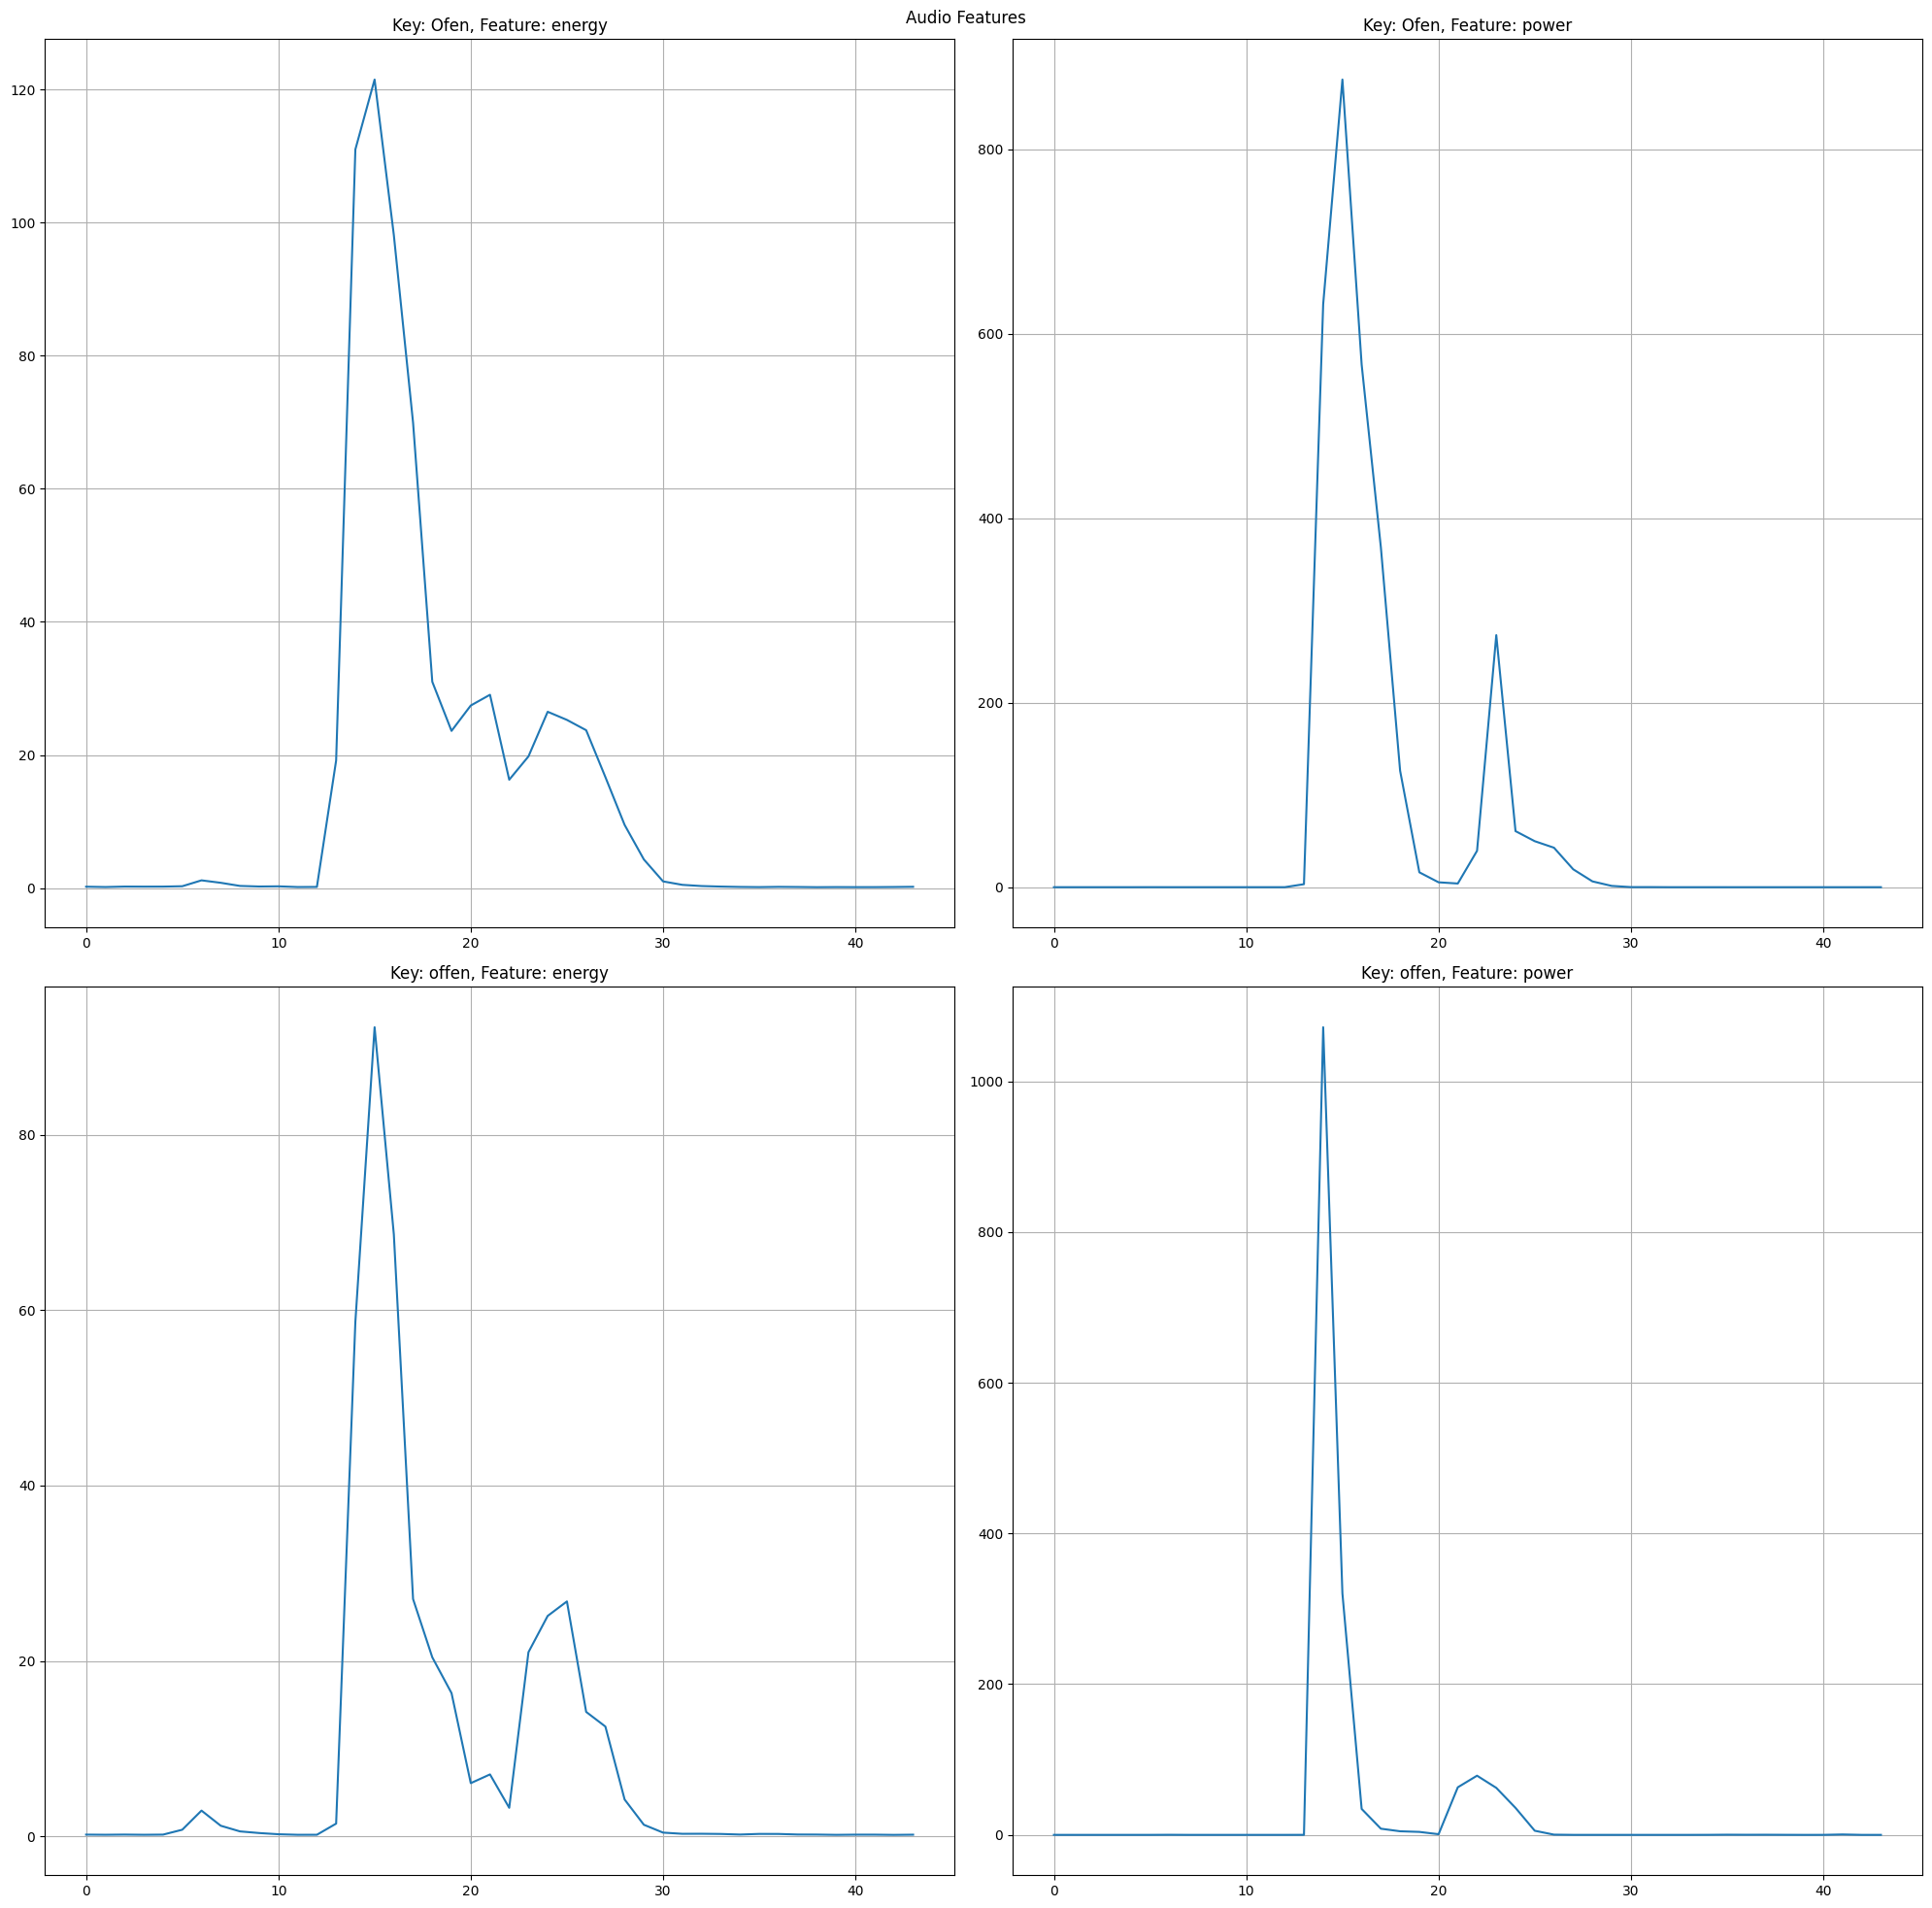

In [229]:
my_test_key_list = ["Ofen", "offen"]
my_feature_list = ["mfcc", "mfcc_d", "mfcc_d2"]
my_feature_list = ["power", "energy"]
plot_feature_row(word_id_dict, my_test_key_list, my_feature_list, dataset_audio, 20)

In [236]:
import random

def plot_feature_row_1(word_id_dict, my_test_key_list, feature_to_plot, dataset_audio, num_samples=1, start=0, random=False):

    fig, axes = plt.subplots(2, num_samples, figsize=(20, 20))

    # Iterate over each row (my_test_key)
    for j, my_test_key in enumerate(my_test_key_list):
        # Generate a random start value for i if random is True
        if random:
            start_value = random.randint(0, len(reordered_dict) - 1)
        else:
            start_value = start
        
        # Iterate over each sample
        for k in range(num_samples):
            # Ensure that my_test_key is a single key, not a list
            if not isinstance(my_test_key, str):
                print(f"Error: Invalid key type for my_test_key: {my_test_key}")
                continue
            
            # Calculate the index based on start value and sample number
            i = start_value + k

            # Get the data for the current feature index
            data = get_numpy_array_with_id(word_id_dict, my_test_key, dataset_audio, i)
            row = j
            col = k  # Adjust the column index based on the sample number

            axes[row, col].set_title(f"Key: {my_test_key} (Sample {k+1})")
            
            # Plot the data for the specified feature
            feature_indices = reordered_dict.get(feature_to_plot, (None, None))
            if feature_indices[0] is not None and feature_indices[1] is not None and feature_indices[0] - feature_indices[1] != 0:
                axes[row, col].imshow(np.flipud(data[2][feature_indices[0]:feature_indices[1], :]), cmap="gray")
            elif feature_indices[0] is not None and feature_indices[1] is not None:
                axes[row, col].plot(data[2][feature_indices[0]])
            ''
            axes[row, col].grid(True)
                
    fig.suptitle("Audio Features\n")
    plt.tight_layout()


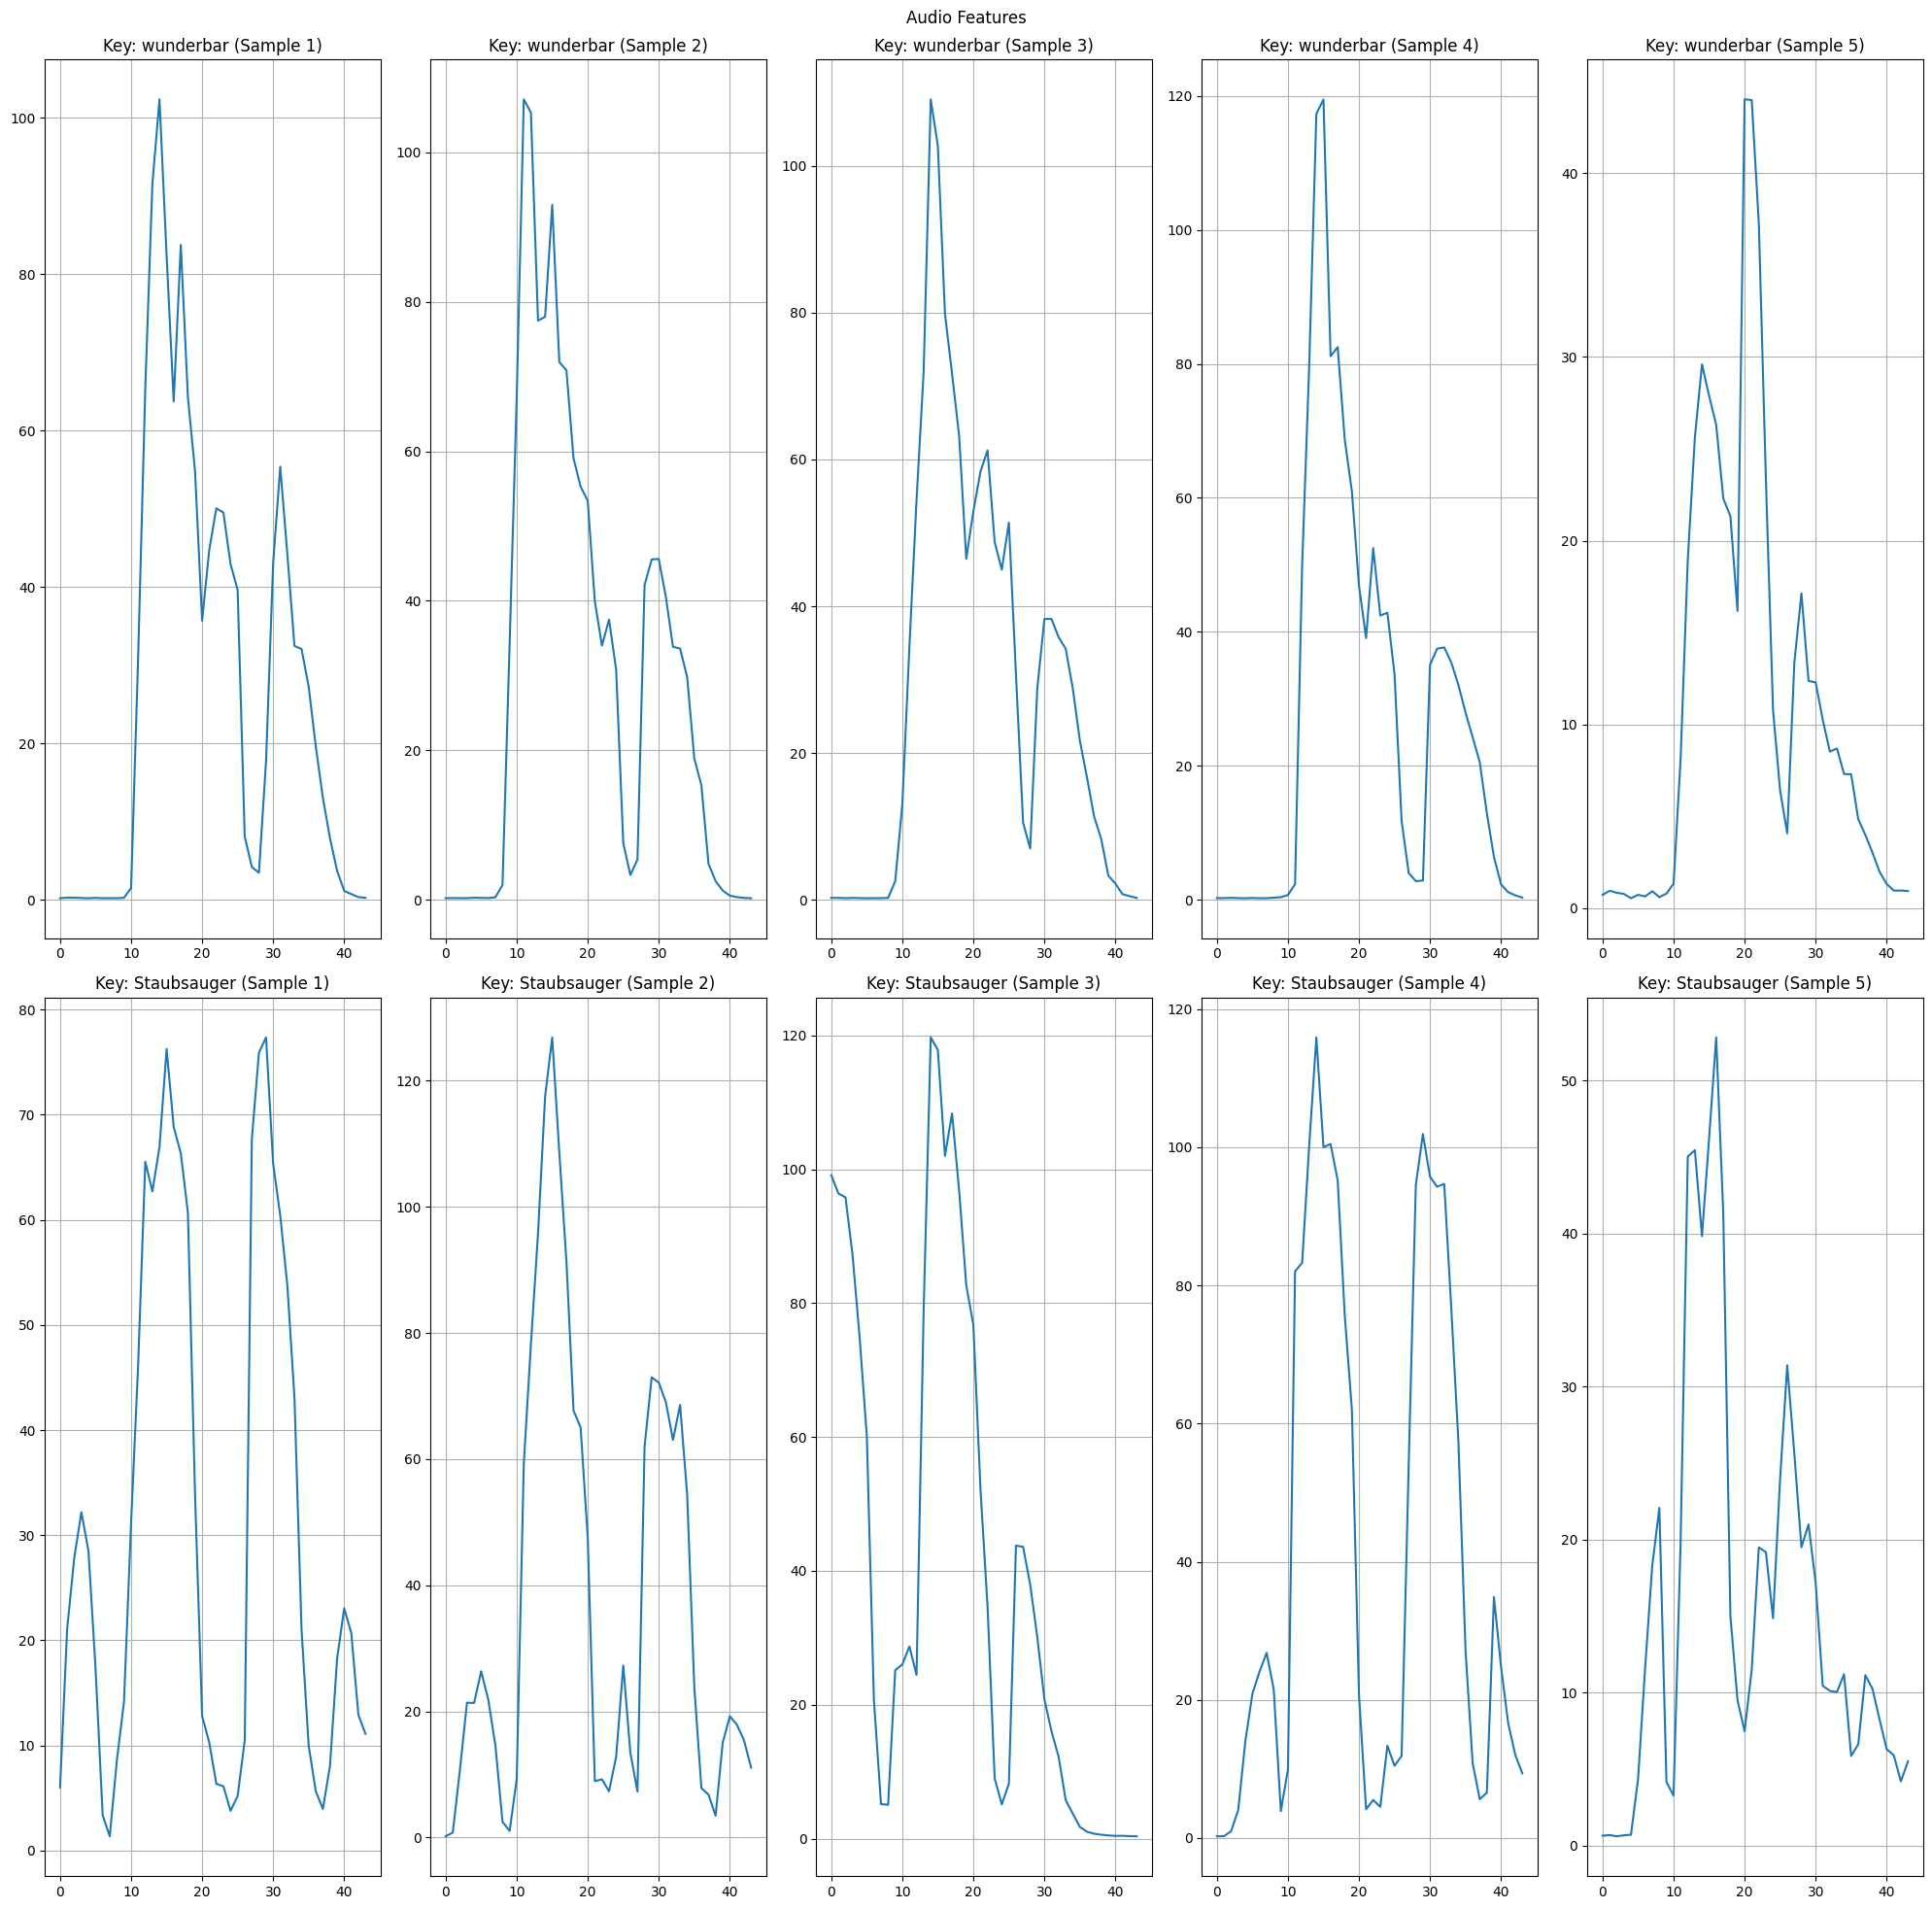

In [237]:
my_test_key_list = ["Ofen", "offen"]
my_test_key_list = ["Licht", "nicht"]
my_test_key_list = ["wunderbar", "Staubsauger"]
my_feature = "energy"
plot_feature_row_1(word_id_dict, my_test_key_list, my_feature, dataset_audio, 5)

In [232]:
import random

def plot_feature_row_overlay(word_id_dict, my_test_key_list, feature_to_plot, dataset_audio, num_samples=1, start=0, random=False):

    fig, axes = plt.subplots(1, num_samples, figsize=(20, 10))

    # Iterate over each row (my_test_key)
    for j, my_test_key in enumerate(my_test_key_list):
        # Generate a random start value for i if random is True
        if random:
            start_value = random.randint(0, len(reordered_dict) - 1)
        else:
            start_value = start
        
        # Iterate over each sample
        for k in range(num_samples):
            # Ensure that my_test_key is a single key, not a list
            if not isinstance(my_test_key, str):
                print(f"Error: Invalid key type for my_test_key: {my_test_key}")
                continue
            
            # Calculate the index based on start value and sample number
            i = start_value + k

            # Get the data for the current feature index
            data = get_numpy_array_with_id(word_id_dict, my_test_key, dataset_audio, i)

            # Plot the data for the specified feature
            feature_indices = reordered_dict.get(feature_to_plot, (None, None))
            if feature_indices[0] is not None and feature_indices[1] is not None and feature_indices[0] - feature_indices[1] != 0:
                axes[k].imshow(np.flipud(data[2][feature_indices[0]:feature_indices[1], :]), cmap="gray", alpha=0.5)
                axes[k].set_title(f"Key: {my_test_key}, Feature: {feature_to_plot} (Sample {k+1})")
            elif feature_indices[0] is not None and feature_indices[1] is not None:
                axes[k].plot(data[2][feature_indices[0]], label=f"Key: {my_test_key}, Feature: {feature_to_plot} (Sample {k+1})")
                axes[k].legend()
            
            axes[k].grid(True)
                
    fig.suptitle("Overlay of Audio Features")
    plt.tight_layout()


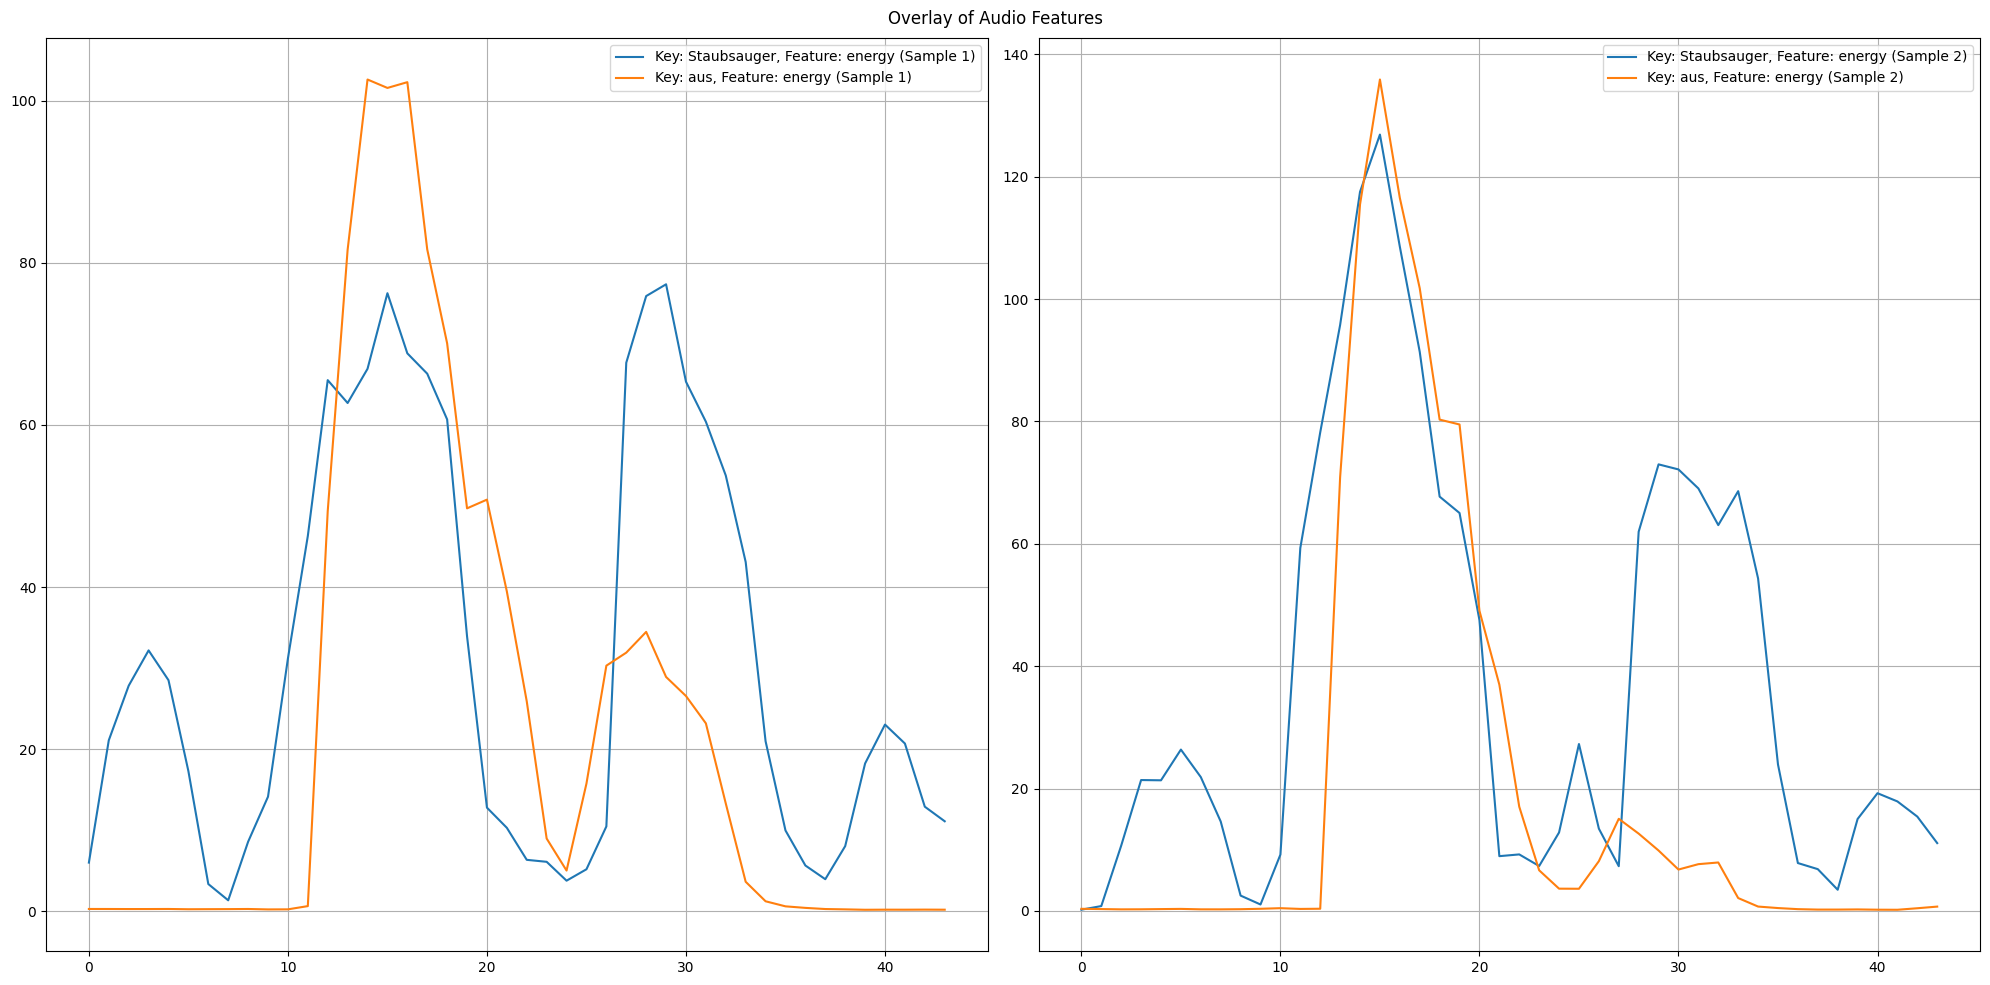

In [233]:
my_test_key_list = ["Staubsauger", "aus"]
my_feature = "energy"
plot_feature_row_overlay(word_id_dict, my_test_key_list, my_feature, dataset_audio, 2)

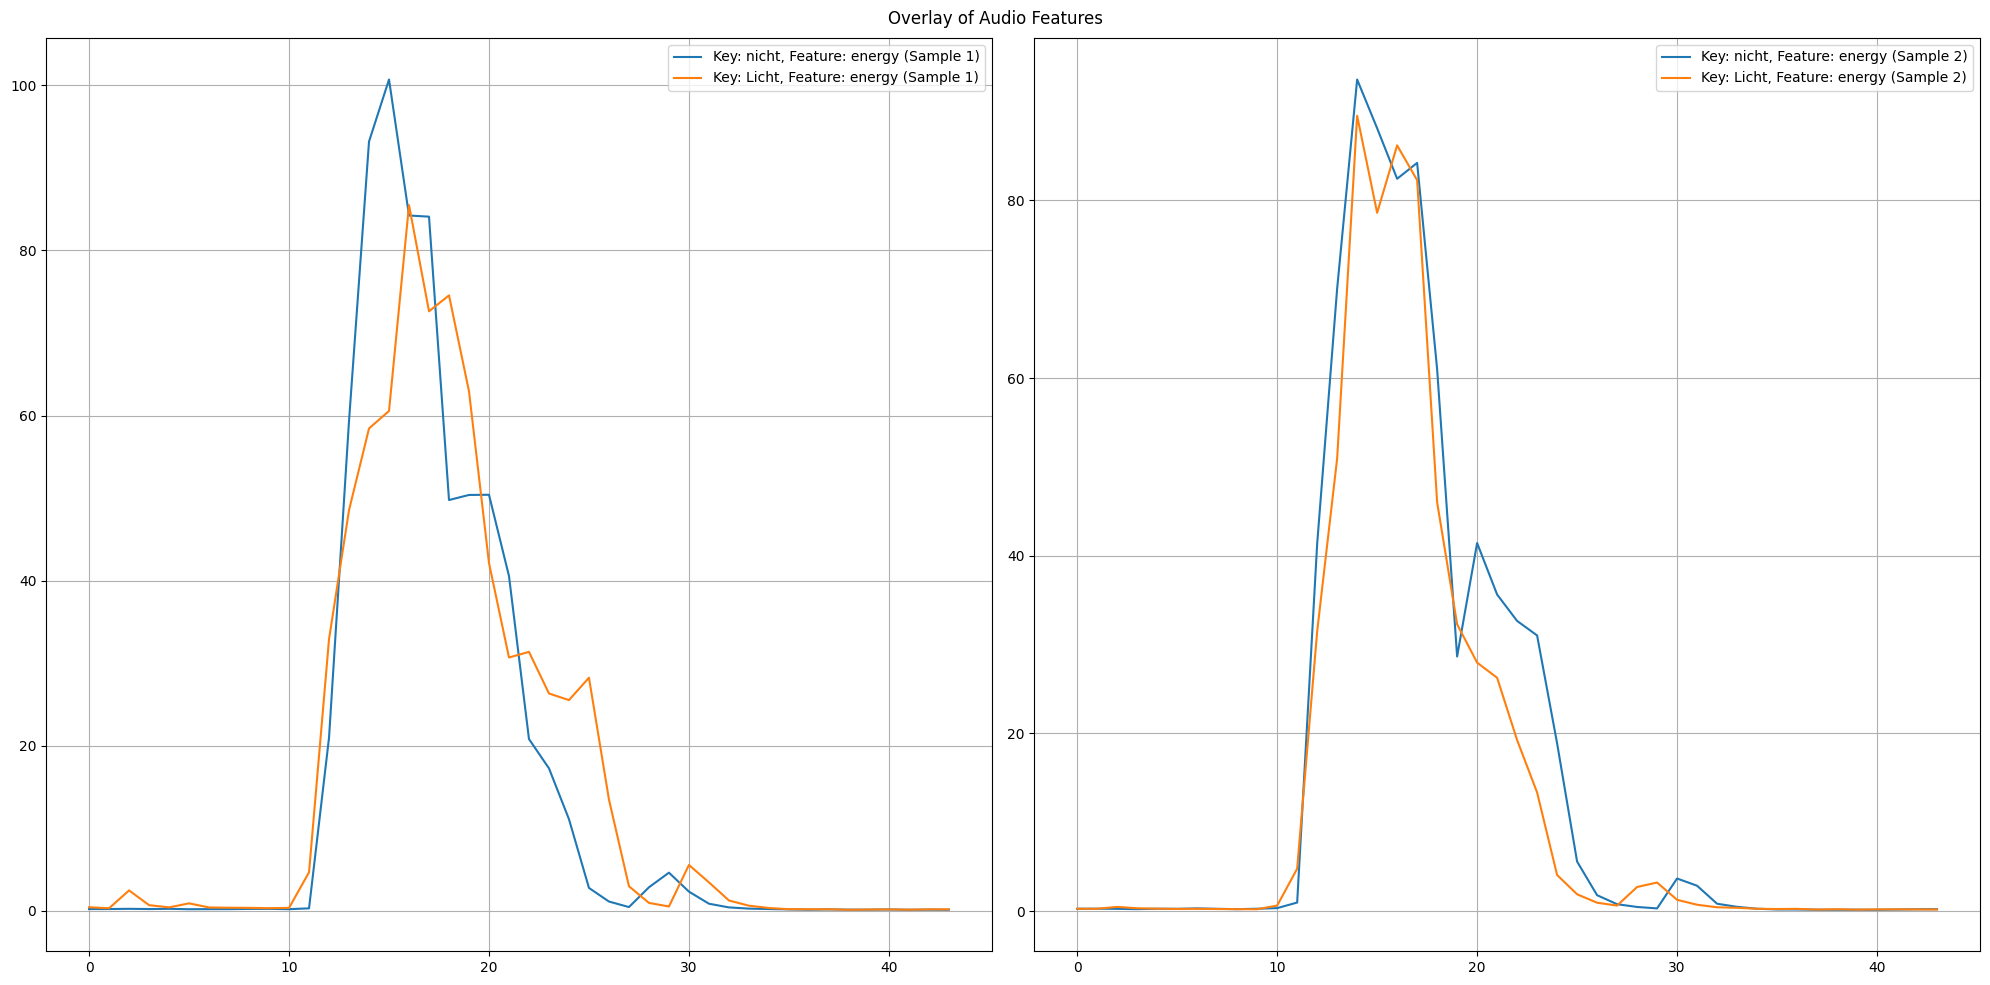

In [234]:
my_test_key_list = ["nicht", "Licht"]
my_feature = "energy"
plot_feature_row_overlay(word_id_dict, my_test_key_list, my_feature, dataset_audio, 2)

# 4. Conclusion

Questions to ask:
* Which features seems useful?
* Which features are correlated?
* Which words have similar feature distribution?

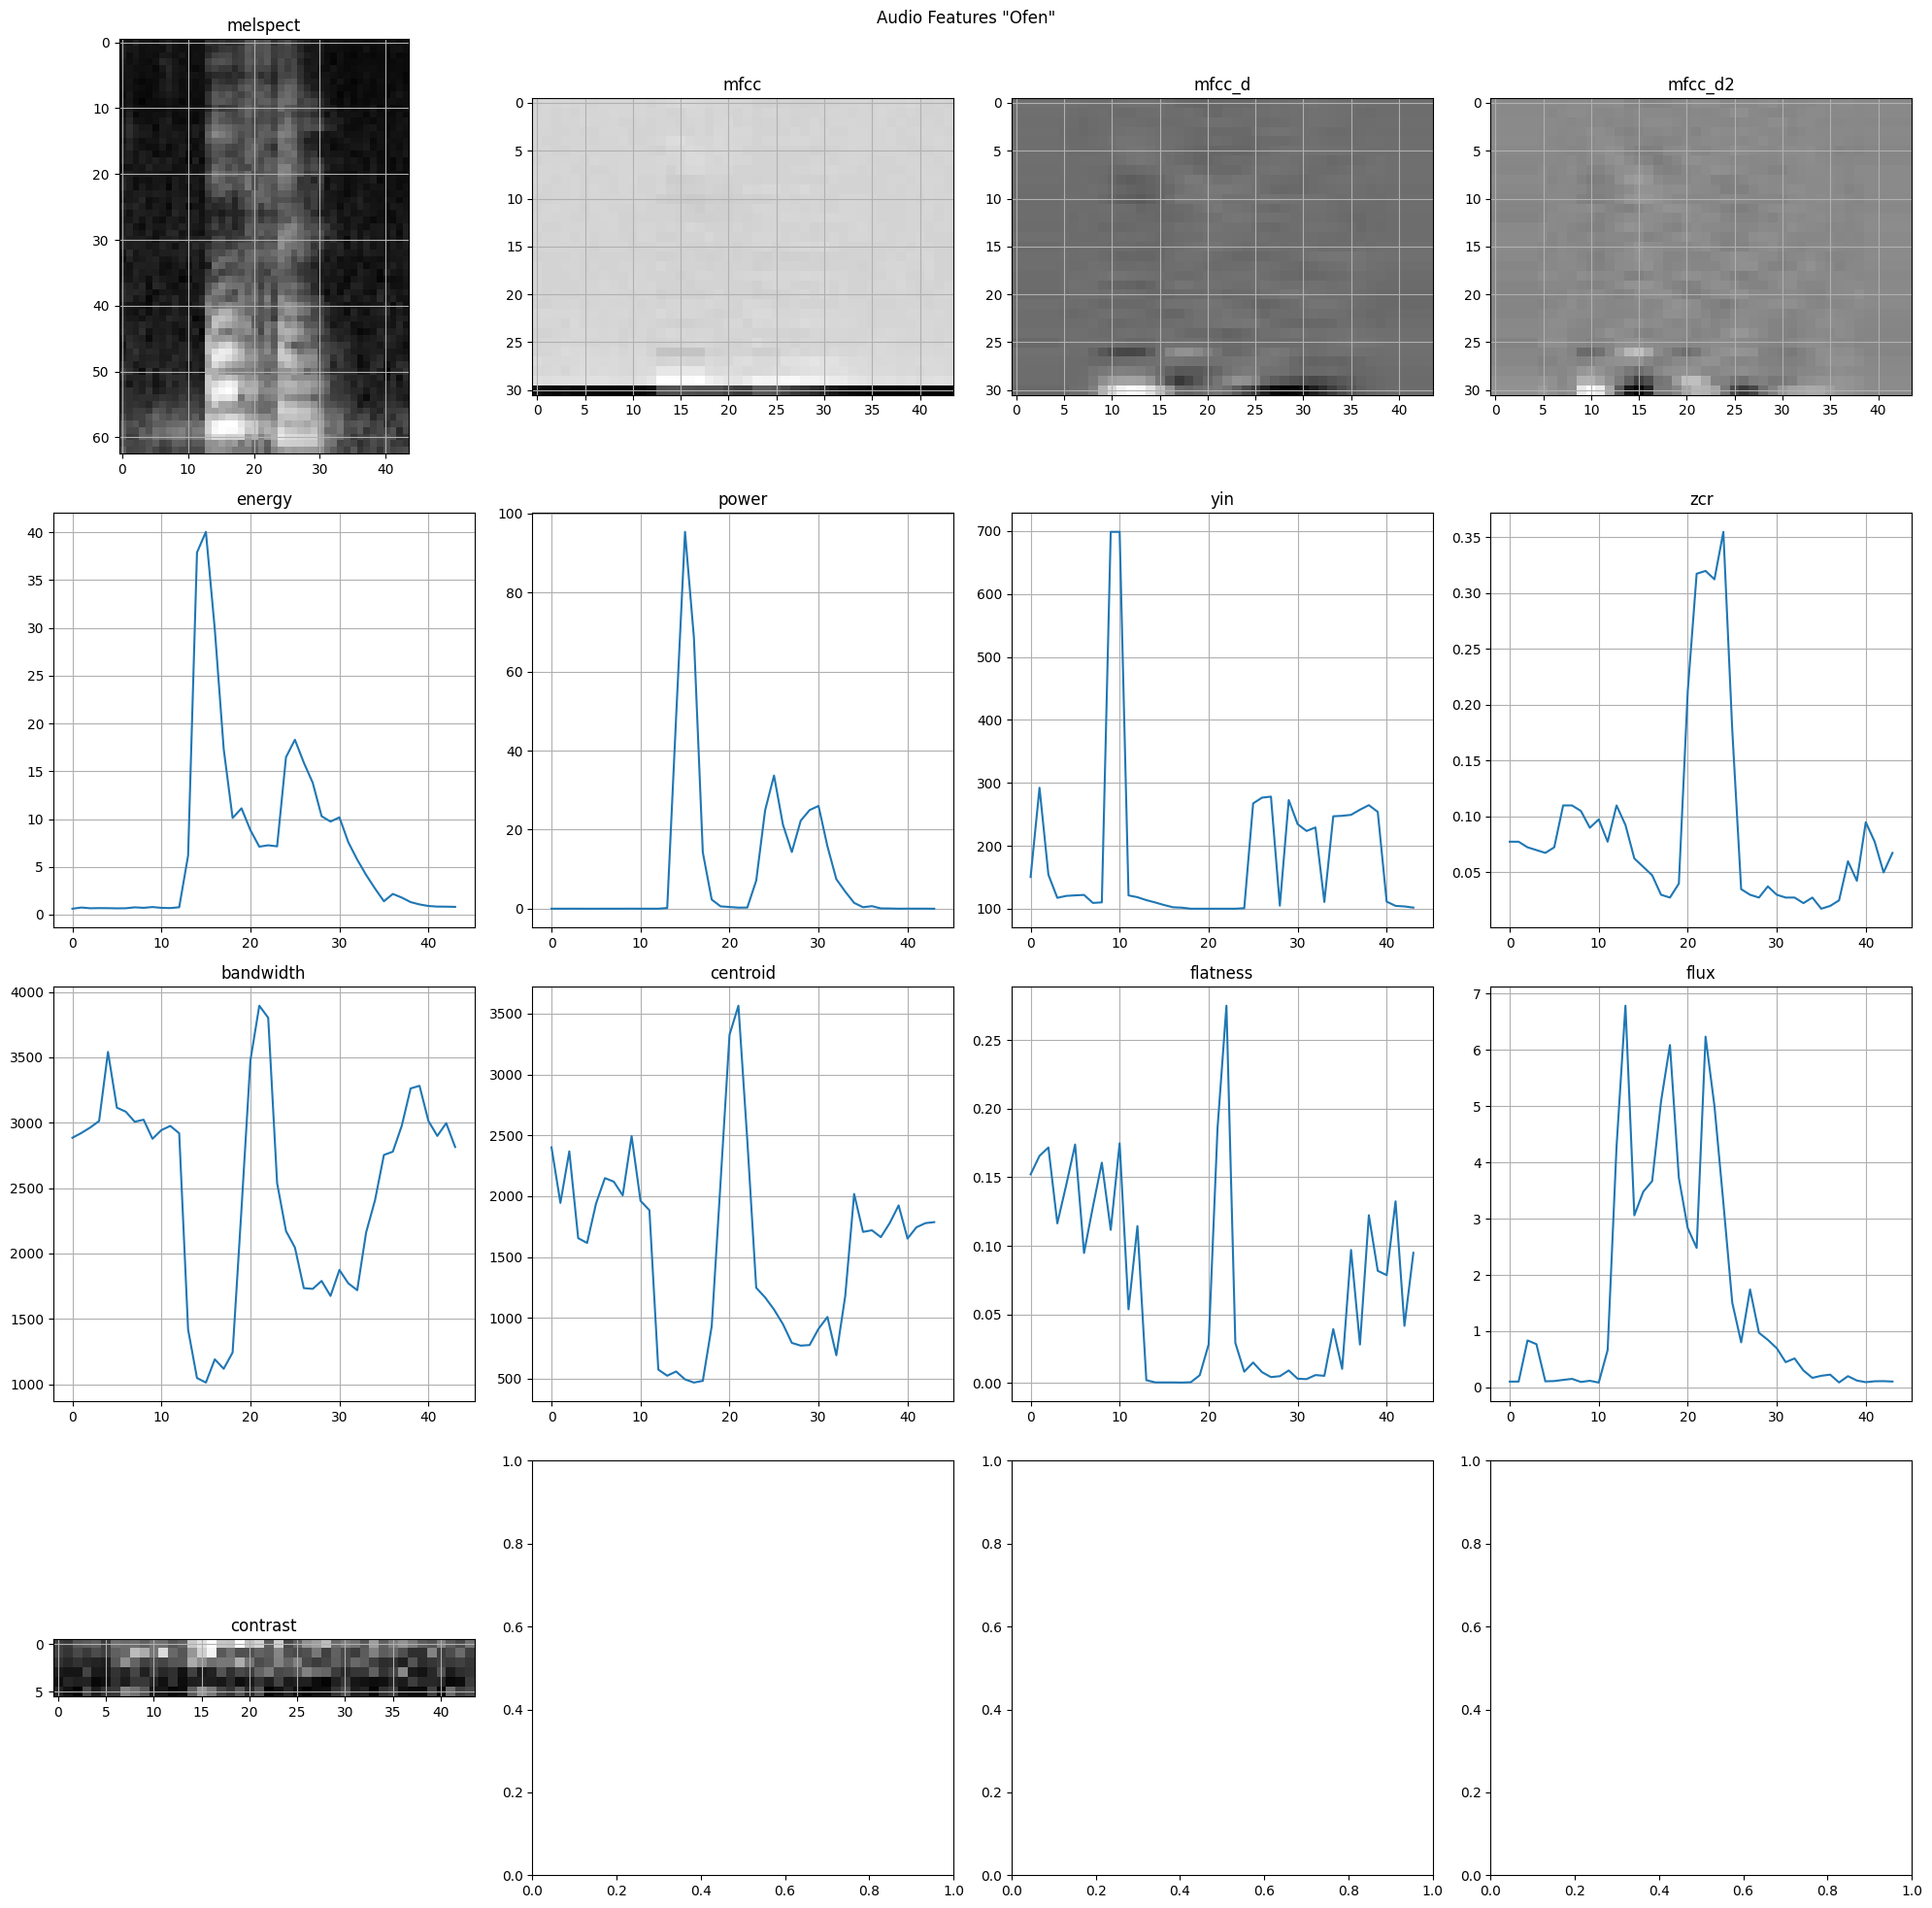

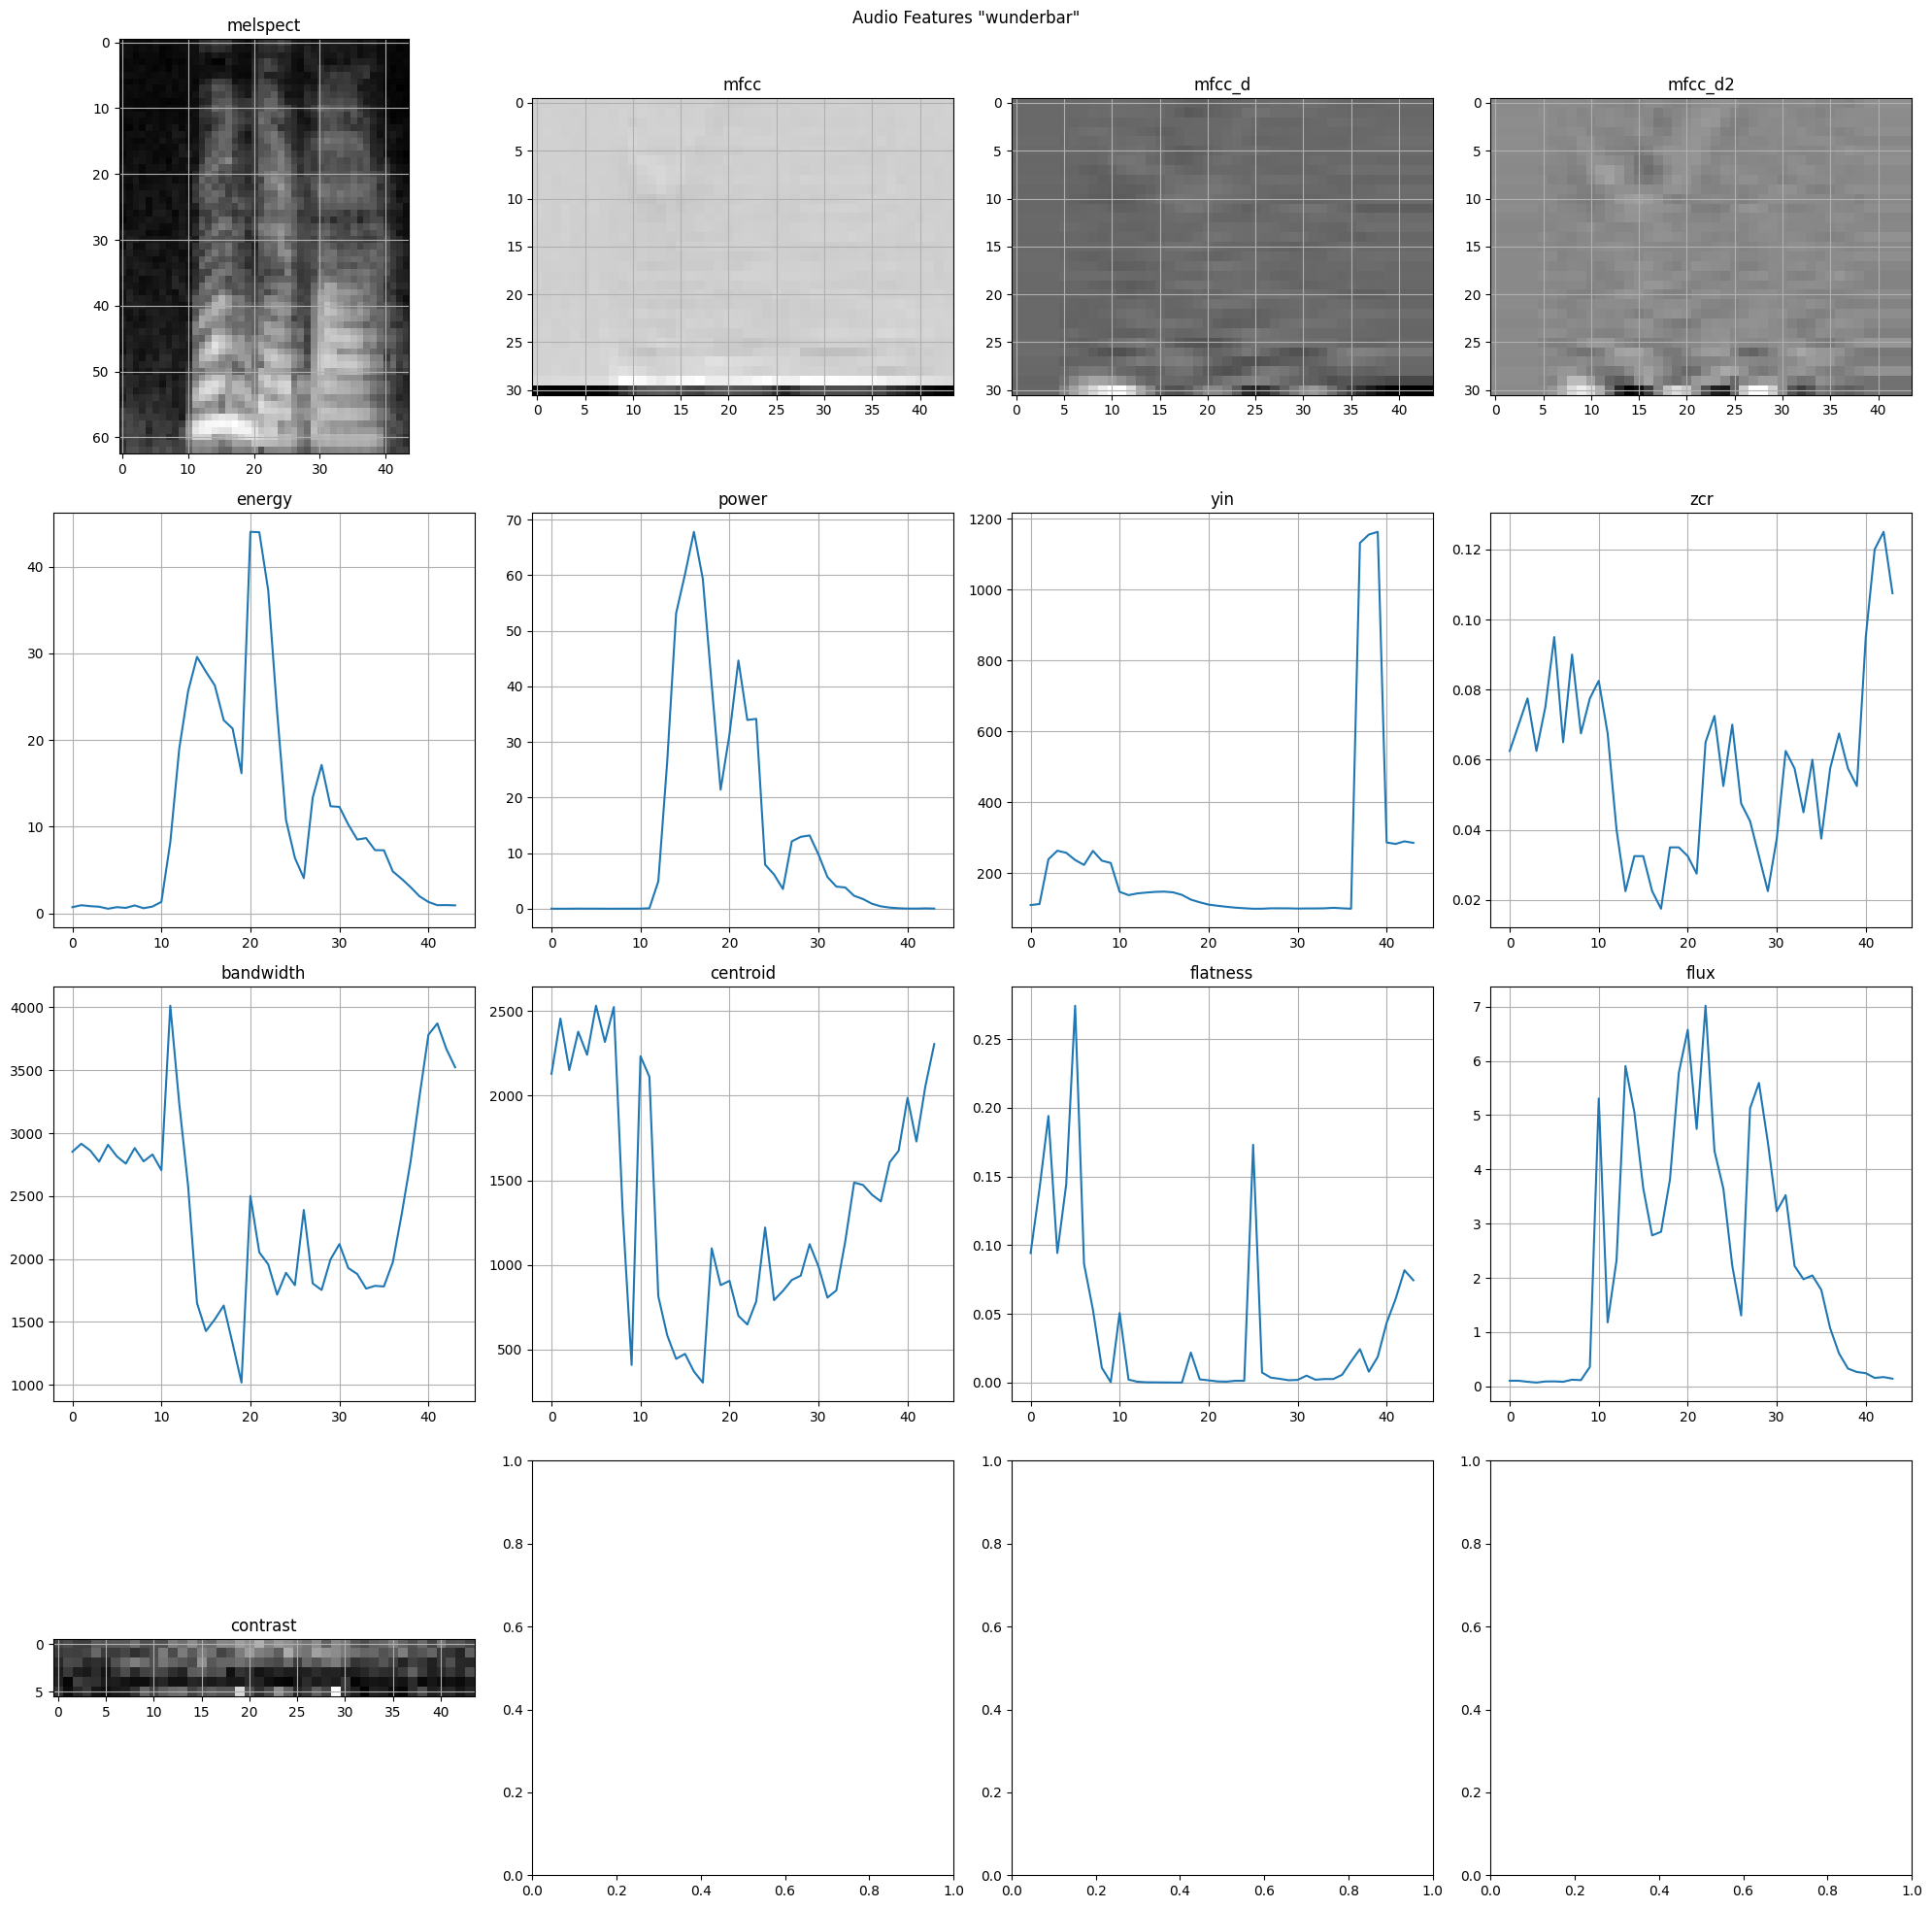

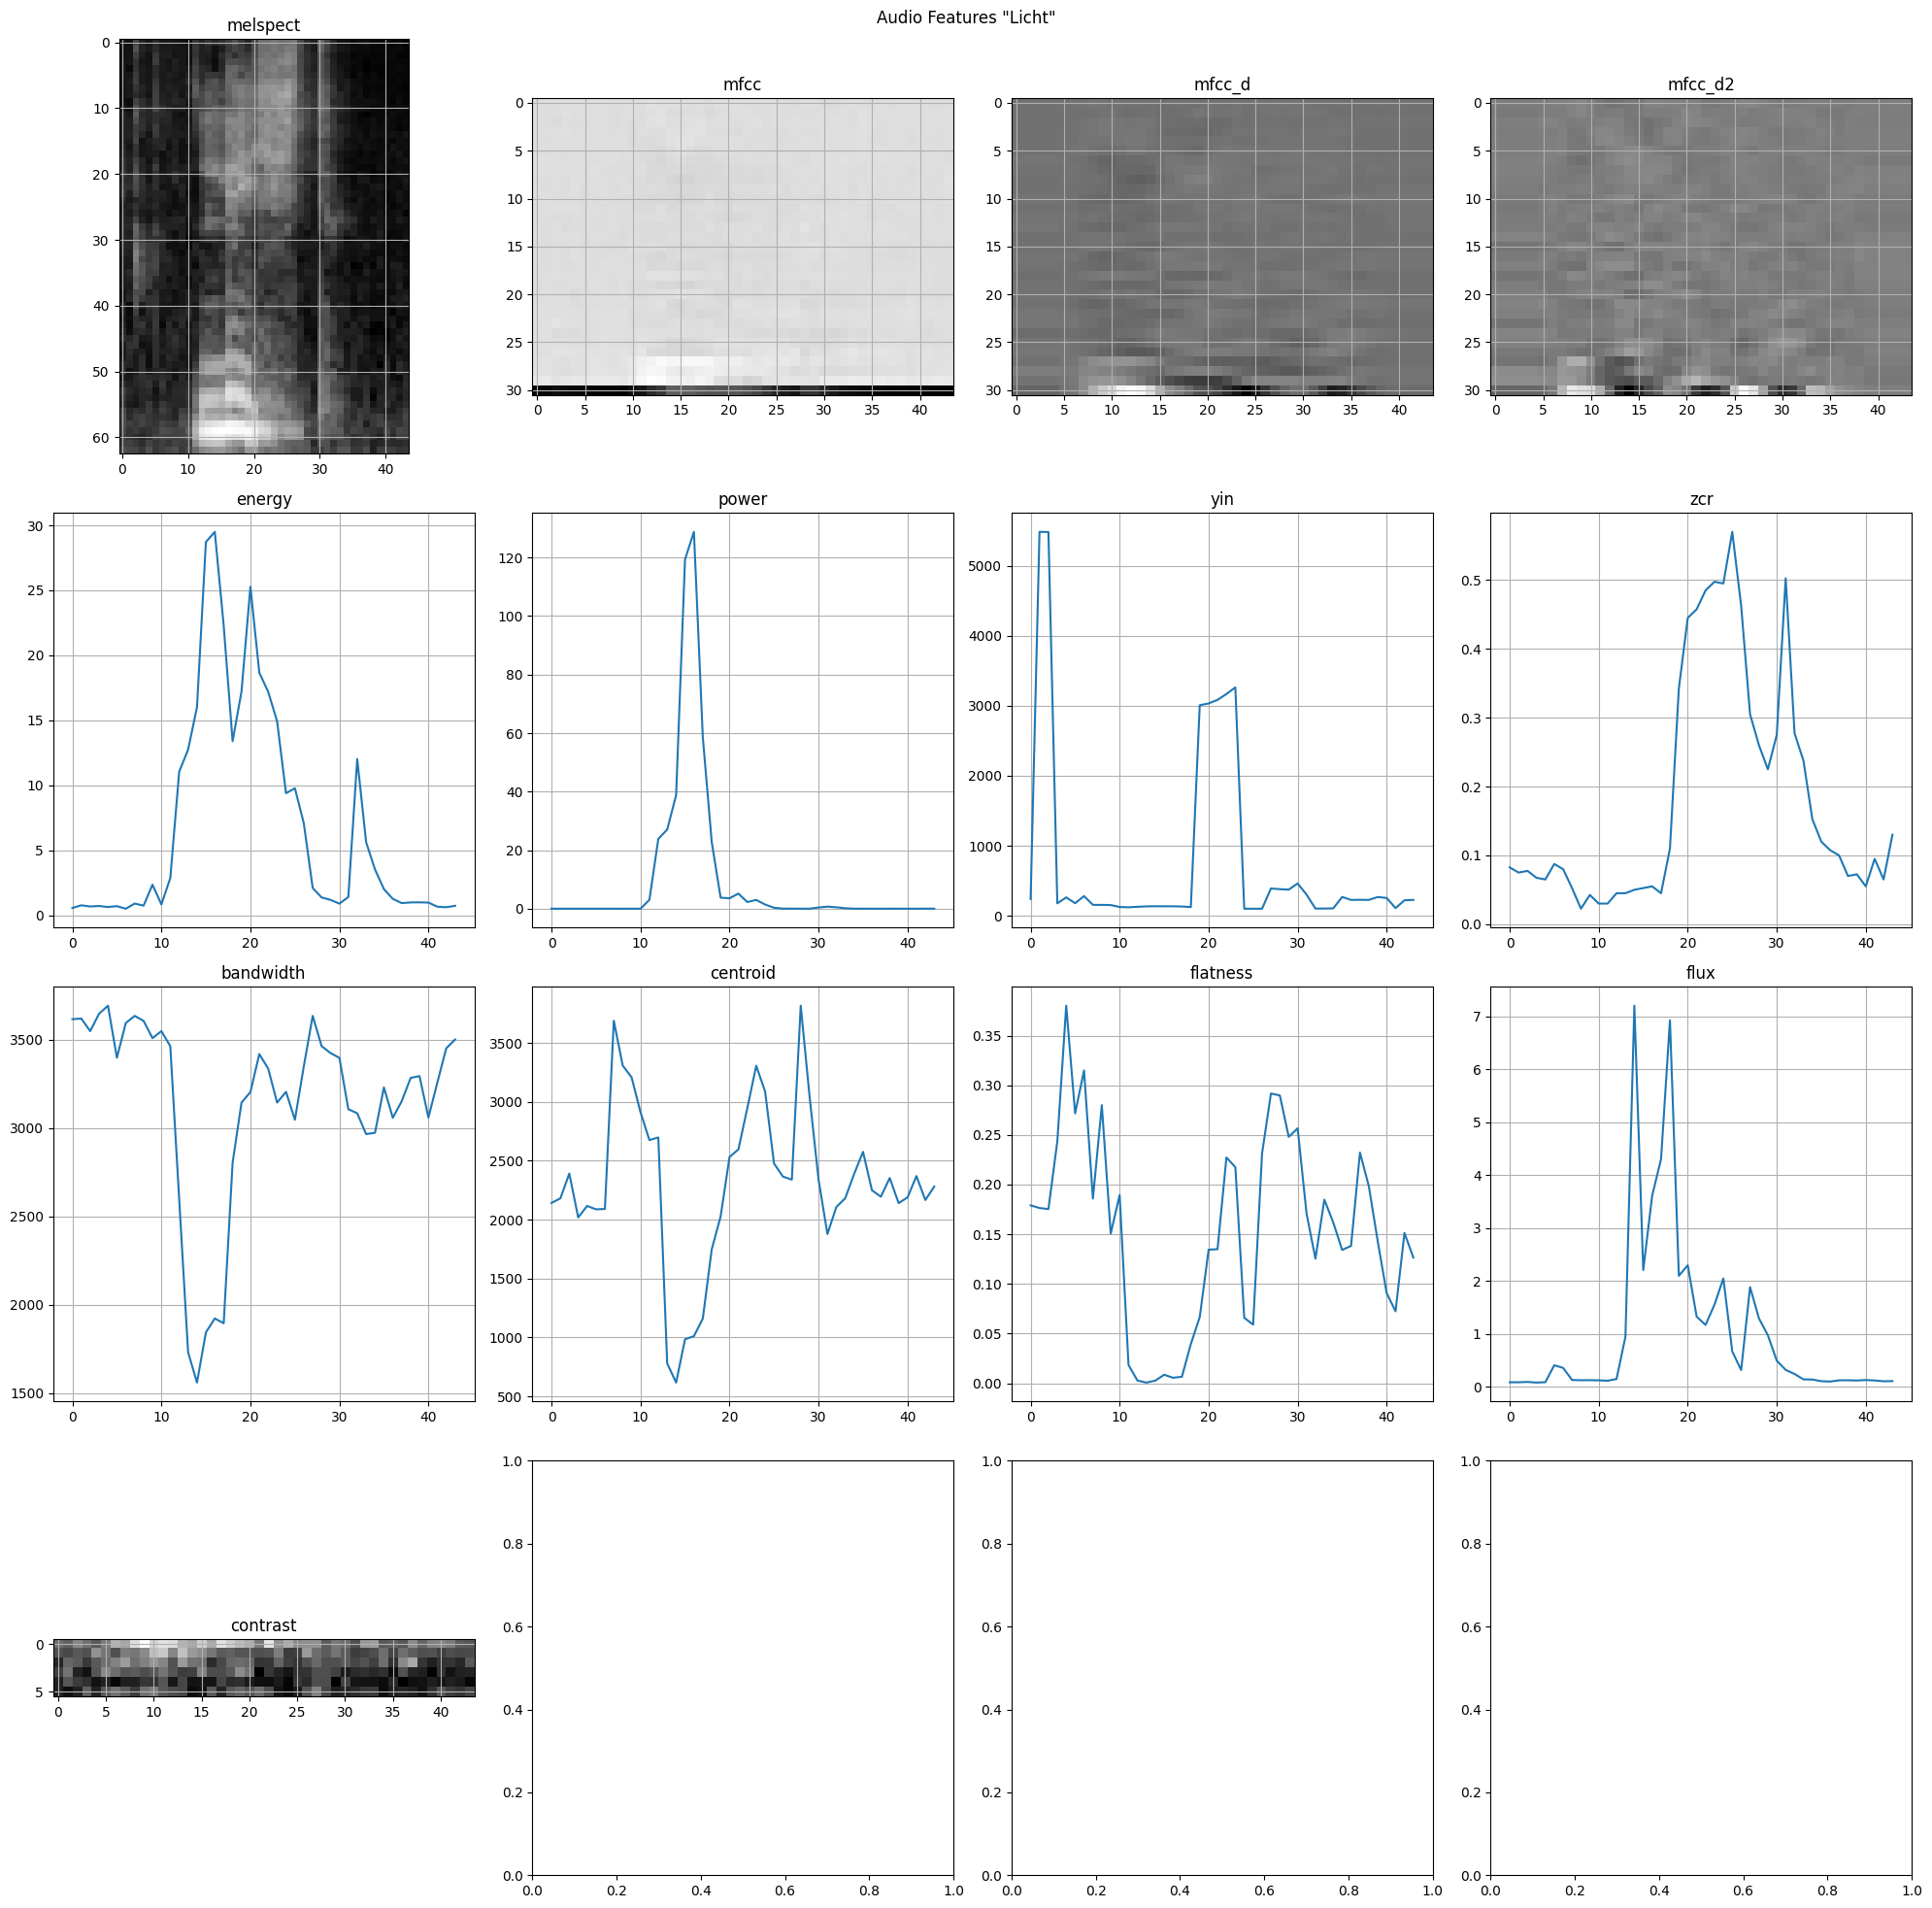

In [239]:
my_test_key = "Ofen"
plot_feature_matrix(word_id_dict, my_test_key, dataset_audio, i)
my_test_key = "wunderbar"
plot_feature_matrix(word_id_dict, my_test_key, dataset_audio, i)
my_test_key = "Licht"
plot_feature_matrix(word_id_dict, my_test_key, dataset_audio, i)

Starting with 2. question:
* By making a visual inspection of all features, mfcc, mfcc_d, mfcc_d2 seems very similar, therfore not much information gain here
* energy and power is also very similar, 1 feature can be removed
* bandwidth for speech / music recognition, no music: no bandwidth needed
* centroid for recognition of bright / dark sound (Ofen vs. Licht / wunderbar)
* flatness and flux is anticorrellated, flux can be removed
* zcr (+ flatness + yin) for noise

1. question:
All the other features seems useful, reduze size of melspec and maybe omit contrast 

3. question:
Check answer of 1. question